In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Nellore']
df.head()

Unnamed: 0  Latitude  Longitude District       Mandal      Village  \
2121        2124     14.53      80.16  Nellore  Indukurpeta  Gangapatnam   
2122        2125     14.53      80.15  Nellore  Indukurpeta  Gangapatnam   
2123        2126     14.53      80.16  Nellore  Indukurpeta  Gangapatnam   
2124        2127     14.54      80.16  Nellore  Indukurpeta  Gangapatnam   
2125        2128     14.54      80.16  Nellore  Indukurpeta  Gangapatnam   

     SoilType    pH    EC    OC  ...     B     Fe    Cu    Mn      NDVI  \
2121    Black  7.75  0.65  1.04  ...  1.92  24.80  1.64  1.60  0.310369   
2122    Black  7.02  0.56  0.81  ...  1.54  21.10  0.98  0.24  0.104885   
2123    Black  7.50  0.31  0.46  ...  1.84  17.96  0.70  0.38  0.310369   
2124    Black  8.28  0.90  0.65  ...  1.08  70.68  2.26  5.60  0.025054   
2125    Black  8.11  0.96  0.50  ...  1.25  31.18  1.46  2.78  0.025054   

          ARVI       EVI       GCI      NDWI   Crop  
2121  0.203352  0.392466  0.858769 -0.300398  Paddy  
2122  0.140139  0.117925  0.051984 -0.025333  Paddy  
2123  0.203352  0.392466  0.858769 -0.300398  Paddy  
2124  0.051326  0.025645  0.003152 -0.001574  Paddy  
2125  0.051326  0.025645  0.003152 -0.001574  Paddy  

[5 rows x 26 columns]

In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

pH          EC          OC           P            K  \
count  435.000000  435.000000  435.000000  435.000000   435.000000   
mean     7.937333    0.617448    0.598897   12.970276   189.786207   
std      0.680049    0.648608    0.242528   15.480318   139.508957   
min      5.250000    0.060000    0.120000    0.660000    33.000000   
25%      7.780000    0.180000    0.400000    4.845000   112.500000   
50%      8.120000    0.490000    0.570000    8.380000   164.000000   
75%      8.340000    0.815000    0.790000   14.490000   232.500000   
max      9.330000    7.850000    1.330000  144.750000  2069.000000   

                Ca           Mg            S          Zn           B  \
count   435.000000   435.000000   435.000000  435.000000  435.000000   
mean   3501.717241   770.052874    93.140805    1.936368    1.536966   
std    1677.652106   413.569089   151.978416    2.283530    0.831028   
min     237.000000    48.000000     1.880000    0.100000    0.160000   
25%    2339.000000   454.500000     7.520000    0.550000    0.900000   
50%    3205.000000   686.000000    55.550000    1.200000    1.390000   
75%    4595.000000  1014.000000   121.180000    2.325000    2.035000   
max    9763.000000  1989.000000  2210.320000   23.920000    8.270000   

               Fe          Cu          Mn         EVI  
count  435.000000  435.000000  435.000000  435.000000  
mean    39.908828    3.049977   11.783747    0.333191  
std     39.992340    2.119376    9.013484    0.217087  
min      1.040000    0.180000    0.090000   -0.166977  
25%      4.485000    1.175000    6.265000    0.226647  
50%     29.700000    2.360000    9.130000    0.282327  
75%     65.100000    4.605000   14.690000    0.337493  
max    210.830000    9.730000   60.260000    1.037491

In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Redsoil', ' Black'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace([' Black', 'Black'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace('Redsoil', 'Red Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 326, 'Red Soil': 109}

<BarContainer object of 2 artists>

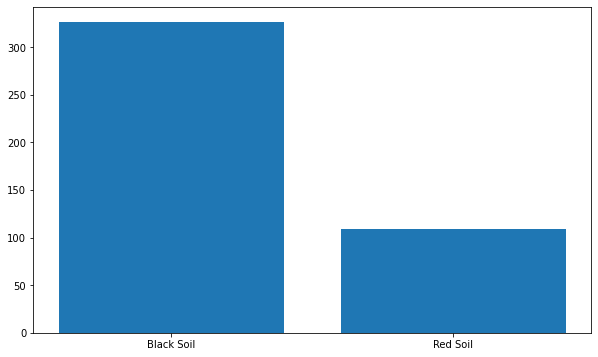

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy', 'Citrus', 'Black gram', 'Green Gram', 'Banana'],
      dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy         267
Citrus        105
Black gram     58
Green Gram      3
Banana          2
Name: Crop, dtype: int64

Paddy         267
Citrus        105
Black gram     58
Name: Crop, dtype: int64


<BarContainer object of 3 artists>

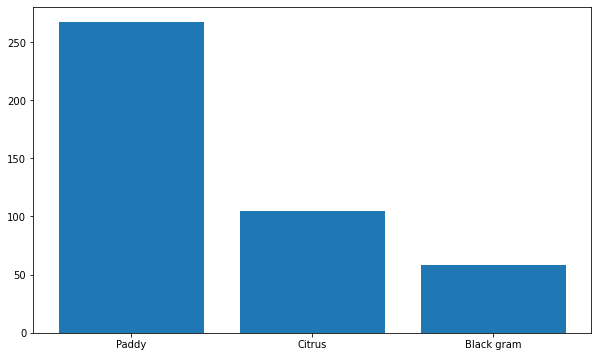

In [15]:
df = df[(df['Crop'] != 'Green Gram') & (df['Crop'] != 'Banana')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

pH        EC        OC         P         K        Ca        Mg  \
pH   1.000000 -0.108915 -0.399399 -0.099154  0.097205  0.450152  0.122614   
EC  -0.108915  1.000000  0.331162  0.141713  0.093619 -0.101416  0.231990   
OC  -0.399399  0.331162  1.000000  0.290462  0.234016 -0.167425  0.375132   
P   -0.099154  0.141713  0.290462  1.000000  0.356177 -0.141434  0.090374   
K    0.097205  0.093619  0.234016  0.356177  1.000000  0.140109  0.414285   
Ca   0.450152 -0.101416 -0.167425 -0.141434  0.140109  1.000000  0.451852   
Mg   0.122614  0.231990  0.375132  0.090374  0.414285  0.451852  1.000000   
S   -0.138248  0.902309  0.275485  0.056146  0.028019 -0.034903  0.172174   
Zn  -0.318327  0.222913  0.404378  0.317506  0.053325 -0.279925  0.005222   
B   -0.213884  0.649595  0.591678  0.232979  0.269589 -0.038406  0.524759   
Fe  -0.667716  0.351346  0.577696  0.111724 -0.001686 -0.395262  0.173382   
Cu  -0.310622  0.388928  0.632627  0.052044  0.251244 -0.094940  0.595319   
Mn  -0.358780  0.225186  0.446818  0.028789  0.210238 -0.029566  0.453250   
EVI -0.229345  0.106579  0.008448  0.039457 -0.076748 -0.189254  0.006962   

            S        Zn         B        Fe        Cu        Mn       EVI  
pH  -0.138248 -0.318327 -0.213884 -0.667716 -0.310622 -0.358780 -0.229345  
EC   0.902309  0.222913  0.649595  0.351346  0.388928  0.225186  0.106579  
OC   0.275485  0.404378  0.591678  0.577696  0.632627  0.446818  0.008448  
P    0.056146  0.317506  0.232979  0.111724  0.052044  0.028789  0.039457  
K    0.028019  0.053325  0.269589 -0.001686  0.251244  0.210238 -0.076748  
Ca  -0.034903 -0.279925 -0.038406 -0.395262 -0.094940 -0.029566 -0.189254  
Mg   0.172174  0.005222  0.524759  0.173382  0.595319  0.453250  0.006962  
S    1.000000  0.179381  0.615608  0.297580  0.320158  0.182469  0.038374  
Zn   0.179381  1.000000  0.252096  0.355795  0.277374  0.092095  0.078855  
B    0.615608  0.252096  1.000000  0.530394  0.633859  0.507055  0.083789  
Fe   0.297580  0.355795  0.530394  1.000000  0.755942  0.554333  0.291694  
Cu   0.320158  0.277374  0.633859  0.755942  1.000000  0.683679  0.199072  
Mn   0.182469  0.092095  0.507055  0.554333  0.683679  1.000000  0.276597  
EVI  0.038374  0.078855  0.083789  0.291694  0.199072  0.276597  1.000000

In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['S', 'B', 'Fe', 'Cu', 'Mn']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'K', 'Ca', 'Mg', 'Zn', 'EVI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P      K      Ca     Mg    Zn       EVI  \
2121  7.75  0.65  1.04  3.18  126.0  1212.0  389.0  5.02  0.392466   

      Black Soil  Red Soil  
2121           1         0  
2121    Paddy
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:9] = sc1.fit_transform(X[:, 0:9])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8703703703703703


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 85.11 %
Standard Deviation: 6.14 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8333333333333334


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.37 %
Standard Deviation: 4.97 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8888888888888888


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.57 %
Standard Deviation: 5.25 %


In [36]:
# pickle.dump(clf3, open('Nellore_model.pkl', 'wb'))
# pickle.dump(sc1, open('Nellore_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8888888888888888


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 85.41 %
Standard Deviation: 5.72 %


# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.9161490683229814
Testing Accuracy:  0.8796296296296297


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 86.34 %
Standard Deviation: 5.07 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.5806178	total: 137ms	remaining: 13.5s
1:	learn: 0.4134885	total: 138ms	remaining: 6.75s
2:	learn: 0.3956474	total: 138ms	remaining: 4.48s
3:	learn: 0.3443414	total: 139ms	remaining: 3.34s
4:	learn: 0.3412777	total: 140ms	remaining: 2.66s
5:	learn: 0.3370235	total: 141ms	remaining: 2.2s
6:	learn: 0.3338478	total: 141ms	remaining: 1.88s
7:	learn: 0.3243625	total: 142ms	remaining: 1.63s
8:	learn: 0.3193464	total: 143ms	remaining: 1.44s
9:	learn: 0.3119046	total: 143ms	remaining: 1.29s
10:	learn: 0.3033996	total: 144ms	remaining: 1.17s
11:	learn: 0.2882015	total: 145ms	remaining: 1.06s
12:	learn: 0.2841916	total: 145ms	remaining: 973ms
13:	learn: 0.2768144	total: 146ms	remaining: 898ms
14:	learn: 0.2730721	total: 147ms	remaining: 833ms
15:	learn: 0.2628771	total: 148ms	remaining: 778ms
16:	learn: 0.2551109	total: 149ms	remaining: 726ms
17:	learn: 0.2462100	total: 149ms	remaining: 681ms
18:	learn: 0.2441718	total: 150ms	remaining: 640ms
19:	learn: 0.2342300	total: 151ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3953934725
bestIteration = 99

Training on fold [1/5]

bestTest = 0.5096427133
bestIteration = 99

Training on fold [2/5]

bestTest = 0.396908236
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4375781097
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3617525897
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0664930	test: 1.0662603	best: 1.0662603 (0)	total: 1.3ms	remaining: 1.3s
1:	learn: 1.0369038	test: 1.0355963	best: 1.0355963 (1)	total: 2.57ms	remaining: 1.28s
2:	learn: 1.0138238	test: 1.0142750	best: 1.0142750 (2)	total: 3.81ms	remaining: 1.27s
3:	learn: 0.9869511	test: 0.9876757	best: 0.9876757 (3)	total: 4.92ms	remaining: 1.23s
4:	learn: 0.9594315	test: 0.9598798	best: 0.9598798 (4)	total: 6.06ms	remaining: 1.21s
5:	learn: 0.9372544	test: 0.9363101	best: 0.9363101 (5)	total: 7.13ms	remaining: 1.18s
6:	learn: 0.9170991	test: 0.9182433	best: 0.9182433 (6)	total: 8.35ms	remaining: 1.18s
7:	learn: 0.8955610	test: 0.8980224	best: 0.8980224 (7)	total: 9.52ms	remaining: 1.18s
8:	learn: 0.8744111	test: 0.8778262	best: 0.8778262 (8)	total: 10.6ms	remaining: 1.17s
9:	learn: 0.8559456	test: 0.8564792	best: 0.8564792 (9)	total: 11.6ms	remaining: 1.15s
10:	learn: 0.8367278	test: 0.8343803	best: 0.8343803 (10)	total: 12.7ms	remaining: 1.14s
11:	learn: 0.8160629	test: 0.8148311	best: 

155:	learn: 0.2791064	test: 0.2859163	best: 0.2859163 (155)	total: 179ms	remaining: 969ms
156:	learn: 0.2786539	test: 0.2859040	best: 0.2859040 (156)	total: 181ms	remaining: 969ms
157:	learn: 0.2776451	test: 0.2857803	best: 0.2857803 (157)	total: 182ms	remaining: 969ms
158:	learn: 0.2767304	test: 0.2850386	best: 0.2850386 (158)	total: 183ms	remaining: 967ms
159:	learn: 0.2760804	test: 0.2842647	best: 0.2842647 (159)	total: 184ms	remaining: 966ms
160:	learn: 0.2750813	test: 0.2837598	best: 0.2837598 (160)	total: 185ms	remaining: 965ms
161:	learn: 0.2743922	test: 0.2835413	best: 0.2835413 (161)	total: 186ms	remaining: 963ms
162:	learn: 0.2739368	test: 0.2837022	best: 0.2835413 (161)	total: 187ms	remaining: 962ms
163:	learn: 0.2732328	test: 0.2824242	best: 0.2824242 (163)	total: 189ms	remaining: 961ms
164:	learn: 0.2727117	test: 0.2816465	best: 0.2816465 (164)	total: 190ms	remaining: 960ms
165:	learn: 0.2721852	test: 0.2816074	best: 0.2816074 (165)	total: 191ms	remaining: 959ms
166:	learn

298:	learn: 0.2034329	test: 0.2468920	best: 0.2468920 (298)	total: 343ms	remaining: 805ms
299:	learn: 0.2028670	test: 0.2464876	best: 0.2464876 (299)	total: 349ms	remaining: 814ms
300:	learn: 0.2026991	test: 0.2464204	best: 0.2464204 (300)	total: 351ms	remaining: 815ms
301:	learn: 0.2023732	test: 0.2461296	best: 0.2461296 (301)	total: 352ms	remaining: 814ms
302:	learn: 0.2021613	test: 0.2459770	best: 0.2459770 (302)	total: 353ms	remaining: 812ms
303:	learn: 0.2017493	test: 0.2454519	best: 0.2454519 (303)	total: 354ms	remaining: 811ms
304:	learn: 0.2014101	test: 0.2450163	best: 0.2450163 (304)	total: 355ms	remaining: 810ms
305:	learn: 0.2011194	test: 0.2448415	best: 0.2448415 (305)	total: 357ms	remaining: 809ms
306:	learn: 0.2009572	test: 0.2448457	best: 0.2448415 (305)	total: 358ms	remaining: 808ms
307:	learn: 0.2008036	test: 0.2447724	best: 0.2447724 (307)	total: 359ms	remaining: 806ms
308:	learn: 0.2004702	test: 0.2446897	best: 0.2446897 (308)	total: 360ms	remaining: 805ms
309:	learn

443:	learn: 0.1605767	test: 0.2384129	best: 0.2378245 (435)	total: 520ms	remaining: 651ms
444:	learn: 0.1603842	test: 0.2382660	best: 0.2378245 (435)	total: 522ms	remaining: 651ms
445:	learn: 0.1600831	test: 0.2380360	best: 0.2378245 (435)	total: 523ms	remaining: 650ms
446:	learn: 0.1595418	test: 0.2377366	best: 0.2377366 (446)	total: 524ms	remaining: 649ms
447:	learn: 0.1593232	test: 0.2379850	best: 0.2377366 (446)	total: 525ms	remaining: 647ms
448:	learn: 0.1592156	test: 0.2379907	best: 0.2377366 (446)	total: 527ms	remaining: 646ms
449:	learn: 0.1590935	test: 0.2380032	best: 0.2377366 (446)	total: 528ms	remaining: 645ms
450:	learn: 0.1589617	test: 0.2379790	best: 0.2377366 (446)	total: 529ms	remaining: 644ms
451:	learn: 0.1587252	test: 0.2379006	best: 0.2377366 (446)	total: 530ms	remaining: 643ms
452:	learn: 0.1585388	test: 0.2378458	best: 0.2377366 (446)	total: 531ms	remaining: 642ms
453:	learn: 0.1581884	test: 0.2379918	best: 0.2377366 (446)	total: 532ms	remaining: 640ms
454:	learn

577:	learn: 0.1309937	test: 0.2355030	best: 0.2355030 (577)	total: 689ms	remaining: 503ms
578:	learn: 0.1307671	test: 0.2353302	best: 0.2353302 (578)	total: 690ms	remaining: 502ms
579:	learn: 0.1306257	test: 0.2353526	best: 0.2353302 (578)	total: 692ms	remaining: 501ms
580:	learn: 0.1303606	test: 0.2354407	best: 0.2353302 (578)	total: 693ms	remaining: 500ms
581:	learn: 0.1301514	test: 0.2353411	best: 0.2353302 (578)	total: 695ms	remaining: 499ms
582:	learn: 0.1300554	test: 0.2352405	best: 0.2352405 (582)	total: 696ms	remaining: 498ms
583:	learn: 0.1297879	test: 0.2349205	best: 0.2349205 (583)	total: 697ms	remaining: 497ms
584:	learn: 0.1297440	test: 0.2348901	best: 0.2348901 (584)	total: 698ms	remaining: 495ms
585:	learn: 0.1295267	test: 0.2349503	best: 0.2348901 (584)	total: 700ms	remaining: 494ms
586:	learn: 0.1294040	test: 0.2350095	best: 0.2348901 (584)	total: 701ms	remaining: 493ms
587:	learn: 0.1292717	test: 0.2348652	best: 0.2348652 (587)	total: 702ms	remaining: 492ms
588:	learn

726:	learn: 0.1051583	test: 0.2338042	best: 0.2325485 (701)	total: 867ms	remaining: 325ms
727:	learn: 0.1050018	test: 0.2339024	best: 0.2325485 (701)	total: 868ms	remaining: 324ms
728:	learn: 0.1046895	test: 0.2334542	best: 0.2325485 (701)	total: 869ms	remaining: 323ms
729:	learn: 0.1045428	test: 0.2333567	best: 0.2325485 (701)	total: 871ms	remaining: 322ms
730:	learn: 0.1044788	test: 0.2331860	best: 0.2325485 (701)	total: 872ms	remaining: 321ms
731:	learn: 0.1043371	test: 0.2329393	best: 0.2325485 (701)	total: 873ms	remaining: 320ms
732:	learn: 0.1042342	test: 0.2327878	best: 0.2325485 (701)	total: 874ms	remaining: 318ms
733:	learn: 0.1040040	test: 0.2331226	best: 0.2325485 (701)	total: 875ms	remaining: 317ms
734:	learn: 0.1039796	test: 0.2330339	best: 0.2325485 (701)	total: 876ms	remaining: 316ms
735:	learn: 0.1038644	test: 0.2329238	best: 0.2325485 (701)	total: 878ms	remaining: 315ms
736:	learn: 0.1036948	test: 0.2331476	best: 0.2325485 (701)	total: 879ms	remaining: 314ms
737:	learn

872:	learn: 0.0857313	test: 0.2335672	best: 0.2321317 (848)	total: 1.04s	remaining: 151ms
873:	learn: 0.0856627	test: 0.2335054	best: 0.2321317 (848)	total: 1.04s	remaining: 150ms
874:	learn: 0.0856288	test: 0.2334528	best: 0.2321317 (848)	total: 1.04s	remaining: 149ms
875:	learn: 0.0855734	test: 0.2335539	best: 0.2321317 (848)	total: 1.04s	remaining: 147ms
876:	learn: 0.0854751	test: 0.2336600	best: 0.2321317 (848)	total: 1.04s	remaining: 146ms
877:	learn: 0.0853738	test: 0.2337510	best: 0.2321317 (848)	total: 1.04s	remaining: 145ms
878:	learn: 0.0853420	test: 0.2337371	best: 0.2321317 (848)	total: 1.04s	remaining: 144ms
879:	learn: 0.0852760	test: 0.2336658	best: 0.2321317 (848)	total: 1.05s	remaining: 143ms
880:	learn: 0.0852296	test: 0.2334420	best: 0.2321317 (848)	total: 1.05s	remaining: 142ms
881:	learn: 0.0849808	test: 0.2334101	best: 0.2321317 (848)	total: 1.05s	remaining: 140ms
882:	learn: 0.0847748	test: 0.2334900	best: 0.2321317 (848)	total: 1.05s	remaining: 139ms
883:	learn

0:	learn: 0.9949418	test: 0.9941575	best: 0.9941575 (0)	total: 1.8ms	remaining: 1.8s
1:	learn: 0.9140011	test: 0.9101975	best: 0.9101975 (1)	total: 3.24ms	remaining: 1.62s
2:	learn: 0.8570680	test: 0.8586030	best: 0.8586030 (2)	total: 4.48ms	remaining: 1.49s
3:	learn: 0.7971727	test: 0.7988871	best: 0.7988871 (3)	total: 5.8ms	remaining: 1.45s
4:	learn: 0.7410225	test: 0.7409578	best: 0.7409578 (4)	total: 7.25ms	remaining: 1.44s
5:	learn: 0.6986401	test: 0.6940290	best: 0.6940290 (5)	total: 8.38ms	remaining: 1.39s
6:	learn: 0.6635582	test: 0.6627916	best: 0.6627916 (6)	total: 9.65ms	remaining: 1.37s
7:	learn: 0.6281095	test: 0.6238132	best: 0.6238132 (7)	total: 10.8ms	remaining: 1.34s
8:	learn: 0.5983205	test: 0.5961965	best: 0.5961965 (8)	total: 12.2ms	remaining: 1.34s
9:	learn: 0.5725475	test: 0.5640399	best: 0.5640399 (9)	total: 13.6ms	remaining: 1.35s
10:	learn: 0.5466929	test: 0.5351659	best: 0.5351659 (10)	total: 15ms	remaining: 1.35s
11:	learn: 0.5208317	test: 0.5067043	best: 0.5

135:	learn: 0.1573665	test: 0.2317832	best: 0.2317832 (135)	total: 166ms	remaining: 1.06s
136:	learn: 0.1567888	test: 0.2316595	best: 0.2316595 (136)	total: 168ms	remaining: 1.06s
137:	learn: 0.1564210	test: 0.2316679	best: 0.2316595 (136)	total: 169ms	remaining: 1.05s
138:	learn: 0.1559804	test: 0.2320987	best: 0.2316595 (136)	total: 170ms	remaining: 1.05s
139:	learn: 0.1549344	test: 0.2317116	best: 0.2316595 (136)	total: 171ms	remaining: 1.05s
140:	learn: 0.1544341	test: 0.2314684	best: 0.2314684 (140)	total: 172ms	remaining: 1.05s
141:	learn: 0.1531365	test: 0.2305546	best: 0.2305546 (141)	total: 174ms	remaining: 1.05s
142:	learn: 0.1523086	test: 0.2307515	best: 0.2305546 (141)	total: 175ms	remaining: 1.05s
143:	learn: 0.1516506	test: 0.2317709	best: 0.2305546 (141)	total: 176ms	remaining: 1.04s
144:	learn: 0.1505770	test: 0.2319082	best: 0.2305546 (141)	total: 177ms	remaining: 1.04s
145:	learn: 0.1499714	test: 0.2319026	best: 0.2305546 (141)	total: 178ms	remaining: 1.04s
146:	learn

278:	learn: 0.0833542	test: 0.2313135	best: 0.2282898 (163)	total: 343ms	remaining: 886ms
279:	learn: 0.0827577	test: 0.2326916	best: 0.2282898 (163)	total: 344ms	remaining: 886ms
280:	learn: 0.0824035	test: 0.2324030	best: 0.2282898 (163)	total: 346ms	remaining: 885ms
281:	learn: 0.0820863	test: 0.2319335	best: 0.2282898 (163)	total: 347ms	remaining: 884ms
282:	learn: 0.0817932	test: 0.2320147	best: 0.2282898 (163)	total: 348ms	remaining: 883ms
283:	learn: 0.0815326	test: 0.2319386	best: 0.2282898 (163)	total: 350ms	remaining: 882ms
284:	learn: 0.0814404	test: 0.2318392	best: 0.2282898 (163)	total: 351ms	remaining: 880ms
285:	learn: 0.0810225	test: 0.2313468	best: 0.2282898 (163)	total: 352ms	remaining: 879ms
286:	learn: 0.0808759	test: 0.2310505	best: 0.2282898 (163)	total: 353ms	remaining: 877ms
287:	learn: 0.0807948	test: 0.2309387	best: 0.2282898 (163)	total: 354ms	remaining: 876ms
288:	learn: 0.0806066	test: 0.2309447	best: 0.2282898 (163)	total: 356ms	remaining: 875ms
289:	learn

422:	learn: 0.0494310	test: 0.2342942	best: 0.2282898 (163)	total: 511ms	remaining: 698ms
423:	learn: 0.0493426	test: 0.2343638	best: 0.2282898 (163)	total: 513ms	remaining: 697ms
424:	learn: 0.0491650	test: 0.2344929	best: 0.2282898 (163)	total: 514ms	remaining: 696ms
425:	learn: 0.0490813	test: 0.2346113	best: 0.2282898 (163)	total: 515ms	remaining: 694ms
426:	learn: 0.0488248	test: 0.2335726	best: 0.2282898 (163)	total: 517ms	remaining: 693ms
427:	learn: 0.0485657	test: 0.2333932	best: 0.2282898 (163)	total: 518ms	remaining: 692ms
428:	learn: 0.0484305	test: 0.2333481	best: 0.2282898 (163)	total: 519ms	remaining: 691ms
429:	learn: 0.0483171	test: 0.2337468	best: 0.2282898 (163)	total: 520ms	remaining: 689ms
430:	learn: 0.0481453	test: 0.2338211	best: 0.2282898 (163)	total: 521ms	remaining: 688ms
431:	learn: 0.0478670	test: 0.2338933	best: 0.2282898 (163)	total: 522ms	remaining: 687ms
432:	learn: 0.0475910	test: 0.2338245	best: 0.2282898 (163)	total: 524ms	remaining: 686ms
433:	learn

557:	learn: 0.0343443	test: 0.2355181	best: 0.2282898 (163)	total: 684ms	remaining: 542ms
558:	learn: 0.0342834	test: 0.2357182	best: 0.2282898 (163)	total: 686ms	remaining: 541ms
559:	learn: 0.0342163	test: 0.2359585	best: 0.2282898 (163)	total: 687ms	remaining: 540ms
560:	learn: 0.0341040	test: 0.2360732	best: 0.2282898 (163)	total: 688ms	remaining: 538ms
561:	learn: 0.0340228	test: 0.2357762	best: 0.2282898 (163)	total: 689ms	remaining: 537ms
562:	learn: 0.0339560	test: 0.2356446	best: 0.2282898 (163)	total: 690ms	remaining: 536ms
563:	learn: 0.0337778	test: 0.2354934	best: 0.2282898 (163)	total: 692ms	remaining: 535ms
564:	learn: 0.0337194	test: 0.2355287	best: 0.2282898 (163)	total: 693ms	remaining: 533ms
565:	learn: 0.0336671	test: 0.2355848	best: 0.2282898 (163)	total: 694ms	remaining: 532ms
566:	learn: 0.0336253	test: 0.2358010	best: 0.2282898 (163)	total: 695ms	remaining: 531ms
567:	learn: 0.0335509	test: 0.2360867	best: 0.2282898 (163)	total: 696ms	remaining: 529ms
568:	learn

711:	learn: 0.0249510	test: 0.2453774	best: 0.2282898 (163)	total: 860ms	remaining: 348ms
712:	learn: 0.0249114	test: 0.2454215	best: 0.2282898 (163)	total: 862ms	remaining: 347ms
713:	learn: 0.0248982	test: 0.2453195	best: 0.2282898 (163)	total: 863ms	remaining: 346ms
714:	learn: 0.0248686	test: 0.2453695	best: 0.2282898 (163)	total: 864ms	remaining: 345ms
715:	learn: 0.0248434	test: 0.2455074	best: 0.2282898 (163)	total: 866ms	remaining: 343ms
716:	learn: 0.0248319	test: 0.2454885	best: 0.2282898 (163)	total: 867ms	remaining: 342ms
717:	learn: 0.0248098	test: 0.2455438	best: 0.2282898 (163)	total: 868ms	remaining: 341ms
718:	learn: 0.0247703	test: 0.2455752	best: 0.2282898 (163)	total: 869ms	remaining: 340ms
719:	learn: 0.0247417	test: 0.2458840	best: 0.2282898 (163)	total: 870ms	remaining: 338ms
720:	learn: 0.0246994	test: 0.2460629	best: 0.2282898 (163)	total: 871ms	remaining: 337ms
721:	learn: 0.0246573	test: 0.2456184	best: 0.2282898 (163)	total: 873ms	remaining: 336ms
722:	learn

847:	learn: 0.0199190	test: 0.2489065	best: 0.2282898 (163)	total: 1.03s	remaining: 185ms
848:	learn: 0.0199022	test: 0.2489988	best: 0.2282898 (163)	total: 1.03s	remaining: 183ms
849:	learn: 0.0198731	test: 0.2489655	best: 0.2282898 (163)	total: 1.03s	remaining: 182ms
850:	learn: 0.0198148	test: 0.2490420	best: 0.2282898 (163)	total: 1.03s	remaining: 181ms
851:	learn: 0.0197811	test: 0.2490757	best: 0.2282898 (163)	total: 1.03s	remaining: 180ms
852:	learn: 0.0197702	test: 0.2489087	best: 0.2282898 (163)	total: 1.04s	remaining: 179ms
853:	learn: 0.0197545	test: 0.2488491	best: 0.2282898 (163)	total: 1.04s	remaining: 177ms
854:	learn: 0.0197028	test: 0.2488487	best: 0.2282898 (163)	total: 1.04s	remaining: 176ms
855:	learn: 0.0196904	test: 0.2488104	best: 0.2282898 (163)	total: 1.04s	remaining: 175ms
856:	learn: 0.0196748	test: 0.2487005	best: 0.2282898 (163)	total: 1.04s	remaining: 174ms
857:	learn: 0.0196550	test: 0.2488368	best: 0.2282898 (163)	total: 1.04s	remaining: 172ms
858:	learn

973:	learn: 0.0166000	test: 0.2547860	best: 0.2282898 (163)	total: 1.2s	remaining: 32ms
974:	learn: 0.0165688	test: 0.2546077	best: 0.2282898 (163)	total: 1.2s	remaining: 30.8ms
975:	learn: 0.0165637	test: 0.2545181	best: 0.2282898 (163)	total: 1.2s	remaining: 29.5ms
976:	learn: 0.0165459	test: 0.2545675	best: 0.2282898 (163)	total: 1.2s	remaining: 28.3ms
977:	learn: 0.0165387	test: 0.2545036	best: 0.2282898 (163)	total: 1.2s	remaining: 27.1ms
978:	learn: 0.0165178	test: 0.2544044	best: 0.2282898 (163)	total: 1.2s	remaining: 25.8ms
979:	learn: 0.0164764	test: 0.2547409	best: 0.2282898 (163)	total: 1.21s	remaining: 24.6ms
980:	learn: 0.0164429	test: 0.2552989	best: 0.2282898 (163)	total: 1.21s	remaining: 23.4ms
981:	learn: 0.0164231	test: 0.2554600	best: 0.2282898 (163)	total: 1.21s	remaining: 22.2ms
982:	learn: 0.0163995	test: 0.2555537	best: 0.2282898 (163)	total: 1.21s	remaining: 20.9ms
983:	learn: 0.0163834	test: 0.2555784	best: 0.2282898 (163)	total: 1.21s	remaining: 19.7ms
984:	le

108:	learn: 0.3087866	test: 0.3438306	best: 0.3438306 (108)	total: 331ms	remaining: 2.71s
109:	learn: 0.3069814	test: 0.3428488	best: 0.3428488 (109)	total: 335ms	remaining: 2.71s
110:	learn: 0.3055163	test: 0.3414670	best: 0.3414670 (110)	total: 338ms	remaining: 2.71s
111:	learn: 0.3038351	test: 0.3392700	best: 0.3392700 (111)	total: 342ms	remaining: 2.71s
112:	learn: 0.3028092	test: 0.3387466	best: 0.3387466 (112)	total: 345ms	remaining: 2.71s
113:	learn: 0.3014399	test: 0.3383275	best: 0.3383275 (113)	total: 348ms	remaining: 2.71s
114:	learn: 0.3005534	test: 0.3377401	best: 0.3377401 (114)	total: 352ms	remaining: 2.71s
115:	learn: 0.2986970	test: 0.3365411	best: 0.3365411 (115)	total: 356ms	remaining: 2.71s
116:	learn: 0.2974833	test: 0.3357124	best: 0.3357124 (116)	total: 360ms	remaining: 2.72s
117:	learn: 0.2961054	test: 0.3341346	best: 0.3341346 (117)	total: 364ms	remaining: 2.72s
118:	learn: 0.2948576	test: 0.3329852	best: 0.3329852 (118)	total: 368ms	remaining: 2.72s
119:	learn

222:	learn: 0.1922160	test: 0.2701623	best: 0.2701623 (222)	total: 702ms	remaining: 2.44s
223:	learn: 0.1914785	test: 0.2703788	best: 0.2701623 (222)	total: 705ms	remaining: 2.44s
224:	learn: 0.1908135	test: 0.2703143	best: 0.2701623 (222)	total: 709ms	remaining: 2.44s
225:	learn: 0.1899853	test: 0.2696629	best: 0.2696629 (225)	total: 712ms	remaining: 2.44s
226:	learn: 0.1891988	test: 0.2694397	best: 0.2694397 (226)	total: 716ms	remaining: 2.44s
227:	learn: 0.1887202	test: 0.2694232	best: 0.2694232 (227)	total: 720ms	remaining: 2.44s
228:	learn: 0.1881550	test: 0.2691823	best: 0.2691823 (228)	total: 724ms	remaining: 2.44s
229:	learn: 0.1876429	test: 0.2686900	best: 0.2686900 (229)	total: 727ms	remaining: 2.43s
230:	learn: 0.1873370	test: 0.2686998	best: 0.2686900 (229)	total: 730ms	remaining: 2.43s
231:	learn: 0.1870845	test: 0.2684902	best: 0.2684902 (231)	total: 733ms	remaining: 2.43s
232:	learn: 0.1864475	test: 0.2682540	best: 0.2682540 (232)	total: 736ms	remaining: 2.42s
233:	learn

338:	learn: 0.1370177	test: 0.2535202	best: 0.2529736 (335)	total: 1.07s	remaining: 2.08s
339:	learn: 0.1366395	test: 0.2536763	best: 0.2529736 (335)	total: 1.07s	remaining: 2.08s
340:	learn: 0.1361575	test: 0.2533577	best: 0.2529736 (335)	total: 1.07s	remaining: 2.08s
341:	learn: 0.1355878	test: 0.2533730	best: 0.2529736 (335)	total: 1.08s	remaining: 2.08s
342:	learn: 0.1351217	test: 0.2536638	best: 0.2529736 (335)	total: 1.08s	remaining: 2.07s
343:	learn: 0.1348014	test: 0.2533777	best: 0.2529736 (335)	total: 1.09s	remaining: 2.07s
344:	learn: 0.1343877	test: 0.2533148	best: 0.2529736 (335)	total: 1.09s	remaining: 2.07s
345:	learn: 0.1338471	test: 0.2532589	best: 0.2529736 (335)	total: 1.09s	remaining: 2.07s
346:	learn: 0.1336488	test: 0.2530038	best: 0.2529736 (335)	total: 1.1s	remaining: 2.07s
347:	learn: 0.1332963	test: 0.2529594	best: 0.2529594 (347)	total: 1.1s	remaining: 2.06s
348:	learn: 0.1330706	test: 0.2526336	best: 0.2526336 (348)	total: 1.1s	remaining: 2.06s
349:	learn: 0

452:	learn: 0.1046131	test: 0.2471389	best: 0.2463594 (439)	total: 1.44s	remaining: 1.74s
453:	learn: 0.1043829	test: 0.2470140	best: 0.2463594 (439)	total: 1.45s	remaining: 1.74s
454:	learn: 0.1040229	test: 0.2469417	best: 0.2463594 (439)	total: 1.45s	remaining: 1.74s
455:	learn: 0.1038106	test: 0.2468452	best: 0.2463594 (439)	total: 1.46s	remaining: 1.74s
456:	learn: 0.1034075	test: 0.2467078	best: 0.2463594 (439)	total: 1.46s	remaining: 1.73s
457:	learn: 0.1032058	test: 0.2467239	best: 0.2463594 (439)	total: 1.46s	remaining: 1.73s
458:	learn: 0.1031105	test: 0.2467633	best: 0.2463594 (439)	total: 1.47s	remaining: 1.73s
459:	learn: 0.1029102	test: 0.2468264	best: 0.2463594 (439)	total: 1.47s	remaining: 1.73s
460:	learn: 0.1026901	test: 0.2465356	best: 0.2463594 (439)	total: 1.47s	remaining: 1.72s
461:	learn: 0.1024199	test: 0.2461694	best: 0.2461694 (461)	total: 1.48s	remaining: 1.72s
462:	learn: 0.1020340	test: 0.2460448	best: 0.2460448 (462)	total: 1.48s	remaining: 1.72s
463:	learn

563:	learn: 0.0820230	test: 0.2432390	best: 0.2431873 (559)	total: 1.81s	remaining: 1.4s
564:	learn: 0.0818042	test: 0.2434004	best: 0.2431873 (559)	total: 1.81s	remaining: 1.4s
565:	learn: 0.0815930	test: 0.2435316	best: 0.2431873 (559)	total: 1.82s	remaining: 1.39s
566:	learn: 0.0814643	test: 0.2433486	best: 0.2431873 (559)	total: 1.82s	remaining: 1.39s
567:	learn: 0.0812170	test: 0.2435356	best: 0.2431873 (559)	total: 1.82s	remaining: 1.39s
568:	learn: 0.0809449	test: 0.2433730	best: 0.2431873 (559)	total: 1.83s	remaining: 1.38s
569:	learn: 0.0807769	test: 0.2432724	best: 0.2431873 (559)	total: 1.83s	remaining: 1.38s
570:	learn: 0.0806327	test: 0.2430782	best: 0.2430782 (570)	total: 1.83s	remaining: 1.38s
571:	learn: 0.0804318	test: 0.2428554	best: 0.2428554 (571)	total: 1.84s	remaining: 1.37s
572:	learn: 0.0802998	test: 0.2429886	best: 0.2428554 (571)	total: 1.84s	remaining: 1.37s
573:	learn: 0.0801182	test: 0.2429301	best: 0.2428554 (571)	total: 1.84s	remaining: 1.37s
574:	learn: 

680:	learn: 0.0652125	test: 0.2420553	best: 0.2406366 (639)	total: 2.18s	remaining: 1.02s
681:	learn: 0.0650824	test: 0.2423276	best: 0.2406366 (639)	total: 2.18s	remaining: 1.02s
682:	learn: 0.0649827	test: 0.2422566	best: 0.2406366 (639)	total: 2.19s	remaining: 1.01s
683:	learn: 0.0648807	test: 0.2424370	best: 0.2406366 (639)	total: 2.19s	remaining: 1.01s
684:	learn: 0.0648184	test: 0.2425824	best: 0.2406366 (639)	total: 2.19s	remaining: 1.01s
685:	learn: 0.0646868	test: 0.2424112	best: 0.2406366 (639)	total: 2.2s	remaining: 1s
686:	learn: 0.0645528	test: 0.2425165	best: 0.2406366 (639)	total: 2.2s	remaining: 1s
687:	learn: 0.0644606	test: 0.2424369	best: 0.2406366 (639)	total: 2.2s	remaining: 1000ms
688:	learn: 0.0643623	test: 0.2422937	best: 0.2406366 (639)	total: 2.21s	remaining: 997ms
689:	learn: 0.0642712	test: 0.2423657	best: 0.2406366 (639)	total: 2.21s	remaining: 993ms
690:	learn: 0.0640958	test: 0.2421306	best: 0.2406366 (639)	total: 2.21s	remaining: 990ms
691:	learn: 0.0640

799:	learn: 0.0535245	test: 0.2438335	best: 0.2406366 (639)	total: 2.56s	remaining: 641ms
800:	learn: 0.0534423	test: 0.2438492	best: 0.2406366 (639)	total: 2.56s	remaining: 637ms
801:	learn: 0.0533392	test: 0.2439898	best: 0.2406366 (639)	total: 2.57s	remaining: 634ms
802:	learn: 0.0532757	test: 0.2440006	best: 0.2406366 (639)	total: 2.57s	remaining: 631ms
803:	learn: 0.0531652	test: 0.2439901	best: 0.2406366 (639)	total: 2.58s	remaining: 628ms
804:	learn: 0.0530786	test: 0.2440877	best: 0.2406366 (639)	total: 2.58s	remaining: 625ms
805:	learn: 0.0530453	test: 0.2440887	best: 0.2406366 (639)	total: 2.58s	remaining: 622ms
806:	learn: 0.0529567	test: 0.2439738	best: 0.2406366 (639)	total: 2.58s	remaining: 618ms
807:	learn: 0.0529174	test: 0.2440721	best: 0.2406366 (639)	total: 2.59s	remaining: 615ms
808:	learn: 0.0528255	test: 0.2441957	best: 0.2406366 (639)	total: 2.59s	remaining: 612ms
809:	learn: 0.0527500	test: 0.2441767	best: 0.2406366 (639)	total: 2.6s	remaining: 609ms
810:	learn:

915:	learn: 0.0454386	test: 0.2459330	best: 0.2406366 (639)	total: 2.93s	remaining: 269ms
916:	learn: 0.0453372	test: 0.2458495	best: 0.2406366 (639)	total: 2.93s	remaining: 266ms
917:	learn: 0.0452906	test: 0.2459657	best: 0.2406366 (639)	total: 2.94s	remaining: 262ms
918:	learn: 0.0452574	test: 0.2458916	best: 0.2406366 (639)	total: 2.94s	remaining: 259ms
919:	learn: 0.0451714	test: 0.2460156	best: 0.2406366 (639)	total: 2.94s	remaining: 256ms
920:	learn: 0.0451009	test: 0.2459442	best: 0.2406366 (639)	total: 2.95s	remaining: 253ms
921:	learn: 0.0450585	test: 0.2458765	best: 0.2406366 (639)	total: 2.95s	remaining: 250ms
922:	learn: 0.0450025	test: 0.2460950	best: 0.2406366 (639)	total: 2.96s	remaining: 247ms
923:	learn: 0.0449180	test: 0.2459261	best: 0.2406366 (639)	total: 2.96s	remaining: 243ms
924:	learn: 0.0448513	test: 0.2458288	best: 0.2406366 (639)	total: 2.96s	remaining: 240ms
925:	learn: 0.0447953	test: 0.2458632	best: 0.2406366 (639)	total: 2.96s	remaining: 237ms
926:	learn

30:	learn: 0.3169386	test: 0.3478477	best: 0.3478477 (30)	total: 99.6ms	remaining: 3.11s
31:	learn: 0.3113869	test: 0.3464220	best: 0.3464220 (31)	total: 103ms	remaining: 3.12s
32:	learn: 0.3056535	test: 0.3438488	best: 0.3438488 (32)	total: 107ms	remaining: 3.13s
33:	learn: 0.3005231	test: 0.3402742	best: 0.3402742 (33)	total: 110ms	remaining: 3.14s
34:	learn: 0.2963903	test: 0.3368402	best: 0.3368402 (34)	total: 114ms	remaining: 3.14s
35:	learn: 0.2928021	test: 0.3329891	best: 0.3329891 (35)	total: 118ms	remaining: 3.15s
36:	learn: 0.2883536	test: 0.3288188	best: 0.3288188 (36)	total: 122ms	remaining: 3.18s
37:	learn: 0.2842385	test: 0.3246153	best: 0.3246153 (37)	total: 125ms	remaining: 3.18s
38:	learn: 0.2775331	test: 0.3211353	best: 0.3211353 (38)	total: 129ms	remaining: 3.17s
39:	learn: 0.2721759	test: 0.3173029	best: 0.3173029 (39)	total: 133ms	remaining: 3.19s
40:	learn: 0.2685875	test: 0.3131761	best: 0.3131761 (40)	total: 136ms	remaining: 3.19s
41:	learn: 0.2650871	test: 0.30

138:	learn: 0.1055000	test: 0.2517953	best: 0.2517953 (138)	total: 452ms	remaining: 2.8s
139:	learn: 0.1044378	test: 0.2534720	best: 0.2517953 (138)	total: 456ms	remaining: 2.8s
140:	learn: 0.1038636	test: 0.2528620	best: 0.2517953 (138)	total: 459ms	remaining: 2.79s
141:	learn: 0.1031420	test: 0.2526338	best: 0.2517953 (138)	total: 462ms	remaining: 2.79s
142:	learn: 0.1022681	test: 0.2530808	best: 0.2517953 (138)	total: 466ms	remaining: 2.79s
143:	learn: 0.1011176	test: 0.2523768	best: 0.2517953 (138)	total: 469ms	remaining: 2.79s
144:	learn: 0.1000319	test: 0.2525437	best: 0.2517953 (138)	total: 472ms	remaining: 2.78s
145:	learn: 0.0994998	test: 0.2527977	best: 0.2517953 (138)	total: 475ms	remaining: 2.78s
146:	learn: 0.0983011	test: 0.2534234	best: 0.2517953 (138)	total: 478ms	remaining: 2.78s
147:	learn: 0.0977554	test: 0.2542767	best: 0.2517953 (138)	total: 482ms	remaining: 2.77s
148:	learn: 0.0972961	test: 0.2546495	best: 0.2517953 (138)	total: 485ms	remaining: 2.77s
149:	learn: 

258:	learn: 0.0499299	test: 0.2564797	best: 0.2474092 (168)	total: 835ms	remaining: 2.39s
259:	learn: 0.0497059	test: 0.2564852	best: 0.2474092 (168)	total: 838ms	remaining: 2.38s
260:	learn: 0.0494081	test: 0.2565455	best: 0.2474092 (168)	total: 842ms	remaining: 2.38s
261:	learn: 0.0491732	test: 0.2563468	best: 0.2474092 (168)	total: 845ms	remaining: 2.38s
262:	learn: 0.0490044	test: 0.2564077	best: 0.2474092 (168)	total: 849ms	remaining: 2.38s
263:	learn: 0.0486725	test: 0.2558154	best: 0.2474092 (168)	total: 852ms	remaining: 2.38s
264:	learn: 0.0485676	test: 0.2555793	best: 0.2474092 (168)	total: 856ms	remaining: 2.37s
265:	learn: 0.0483546	test: 0.2554530	best: 0.2474092 (168)	total: 860ms	remaining: 2.37s
266:	learn: 0.0482100	test: 0.2558823	best: 0.2474092 (168)	total: 863ms	remaining: 2.37s
267:	learn: 0.0480326	test: 0.2557500	best: 0.2474092 (168)	total: 866ms	remaining: 2.37s
268:	learn: 0.0478611	test: 0.2554186	best: 0.2474092 (168)	total: 869ms	remaining: 2.36s
269:	learn

374:	learn: 0.0313320	test: 0.2594560	best: 0.2474092 (168)	total: 1.2s	remaining: 2s
375:	learn: 0.0312507	test: 0.2596487	best: 0.2474092 (168)	total: 1.21s	remaining: 2s
376:	learn: 0.0312088	test: 0.2594150	best: 0.2474092 (168)	total: 1.21s	remaining: 2s
377:	learn: 0.0310936	test: 0.2592986	best: 0.2474092 (168)	total: 1.21s	remaining: 1.99s
378:	learn: 0.0309695	test: 0.2587226	best: 0.2474092 (168)	total: 1.22s	remaining: 1.99s
379:	learn: 0.0308436	test: 0.2590958	best: 0.2474092 (168)	total: 1.22s	remaining: 1.99s
380:	learn: 0.0307434	test: 0.2588148	best: 0.2474092 (168)	total: 1.22s	remaining: 1.99s
381:	learn: 0.0306508	test: 0.2588831	best: 0.2474092 (168)	total: 1.23s	remaining: 1.98s
382:	learn: 0.0304610	test: 0.2593791	best: 0.2474092 (168)	total: 1.23s	remaining: 1.98s
383:	learn: 0.0303508	test: 0.2595659	best: 0.2474092 (168)	total: 1.23s	remaining: 1.98s
384:	learn: 0.0303151	test: 0.2596522	best: 0.2474092 (168)	total: 1.24s	remaining: 1.98s
385:	learn: 0.030149

492:	learn: 0.0224844	test: 0.2641043	best: 0.2474092 (168)	total: 1.57s	remaining: 1.62s
493:	learn: 0.0224565	test: 0.2642527	best: 0.2474092 (168)	total: 1.58s	remaining: 1.62s
494:	learn: 0.0223939	test: 0.2644695	best: 0.2474092 (168)	total: 1.58s	remaining: 1.61s
495:	learn: 0.0223713	test: 0.2643543	best: 0.2474092 (168)	total: 1.58s	remaining: 1.61s
496:	learn: 0.0223117	test: 0.2643880	best: 0.2474092 (168)	total: 1.59s	remaining: 1.61s
497:	learn: 0.0222214	test: 0.2644823	best: 0.2474092 (168)	total: 1.59s	remaining: 1.6s
498:	learn: 0.0221948	test: 0.2645826	best: 0.2474092 (168)	total: 1.6s	remaining: 1.6s
499:	learn: 0.0221312	test: 0.2645573	best: 0.2474092 (168)	total: 1.6s	remaining: 1.6s
500:	learn: 0.0220641	test: 0.2643189	best: 0.2474092 (168)	total: 1.6s	remaining: 1.6s
501:	learn: 0.0219646	test: 0.2649419	best: 0.2474092 (168)	total: 1.6s	remaining: 1.59s
502:	learn: 0.0219061	test: 0.2649012	best: 0.2474092 (168)	total: 1.61s	remaining: 1.59s
503:	learn: 0.0218

610:	learn: 0.0170658	test: 0.2684814	best: 0.2474092 (168)	total: 1.95s	remaining: 1.24s
611:	learn: 0.0170296	test: 0.2685515	best: 0.2474092 (168)	total: 1.95s	remaining: 1.24s
612:	learn: 0.0169873	test: 0.2686892	best: 0.2474092 (168)	total: 1.95s	remaining: 1.23s
613:	learn: 0.0169478	test: 0.2688388	best: 0.2474092 (168)	total: 1.96s	remaining: 1.23s
614:	learn: 0.0169266	test: 0.2691298	best: 0.2474092 (168)	total: 1.96s	remaining: 1.23s
615:	learn: 0.0169041	test: 0.2690581	best: 0.2474092 (168)	total: 1.96s	remaining: 1.22s
616:	learn: 0.0168795	test: 0.2691231	best: 0.2474092 (168)	total: 1.97s	remaining: 1.22s
617:	learn: 0.0168383	test: 0.2694680	best: 0.2474092 (168)	total: 1.97s	remaining: 1.22s
618:	learn: 0.0168036	test: 0.2693630	best: 0.2474092 (168)	total: 1.97s	remaining: 1.21s
619:	learn: 0.0167554	test: 0.2693625	best: 0.2474092 (168)	total: 1.98s	remaining: 1.21s
620:	learn: 0.0167177	test: 0.2697382	best: 0.2474092 (168)	total: 1.98s	remaining: 1.21s
621:	learn

727:	learn: 0.0137544	test: 0.2714622	best: 0.2474092 (168)	total: 2.31s	remaining: 864ms
728:	learn: 0.0137291	test: 0.2715733	best: 0.2474092 (168)	total: 2.31s	remaining: 861ms
729:	learn: 0.0137116	test: 0.2716354	best: 0.2474092 (168)	total: 2.32s	remaining: 857ms
730:	learn: 0.0136987	test: 0.2715488	best: 0.2474092 (168)	total: 2.32s	remaining: 854ms
731:	learn: 0.0136748	test: 0.2713163	best: 0.2474092 (168)	total: 2.32s	remaining: 851ms
732:	learn: 0.0136672	test: 0.2712139	best: 0.2474092 (168)	total: 2.33s	remaining: 848ms
733:	learn: 0.0136195	test: 0.2714183	best: 0.2474092 (168)	total: 2.33s	remaining: 845ms
734:	learn: 0.0135894	test: 0.2713536	best: 0.2474092 (168)	total: 2.33s	remaining: 842ms
735:	learn: 0.0135767	test: 0.2714400	best: 0.2474092 (168)	total: 2.34s	remaining: 839ms
736:	learn: 0.0135631	test: 0.2714030	best: 0.2474092 (168)	total: 2.34s	remaining: 836ms
737:	learn: 0.0135564	test: 0.2715188	best: 0.2474092 (168)	total: 2.35s	remaining: 833ms
738:	learn

844:	learn: 0.0113320	test: 0.2754674	best: 0.2474092 (168)	total: 2.68s	remaining: 491ms
845:	learn: 0.0113041	test: 0.2756381	best: 0.2474092 (168)	total: 2.68s	remaining: 488ms
846:	learn: 0.0112808	test: 0.2757519	best: 0.2474092 (168)	total: 2.69s	remaining: 485ms
847:	learn: 0.0112703	test: 0.2756852	best: 0.2474092 (168)	total: 2.69s	remaining: 482ms
848:	learn: 0.0112659	test: 0.2756065	best: 0.2474092 (168)	total: 2.69s	remaining: 479ms
849:	learn: 0.0112530	test: 0.2756462	best: 0.2474092 (168)	total: 2.7s	remaining: 476ms
850:	learn: 0.0112306	test: 0.2755819	best: 0.2474092 (168)	total: 2.7s	remaining: 473ms
851:	learn: 0.0112139	test: 0.2756162	best: 0.2474092 (168)	total: 2.7s	remaining: 470ms
852:	learn: 0.0111995	test: 0.2757774	best: 0.2474092 (168)	total: 2.71s	remaining: 466ms
853:	learn: 0.0111928	test: 0.2757192	best: 0.2474092 (168)	total: 2.71s	remaining: 463ms
854:	learn: 0.0111789	test: 0.2756475	best: 0.2474092 (168)	total: 2.71s	remaining: 460ms
855:	learn: 0

953:	learn: 0.0097958	test: 0.2803340	best: 0.2474092 (168)	total: 3.04s	remaining: 147ms
954:	learn: 0.0097898	test: 0.2801111	best: 0.2474092 (168)	total: 3.05s	remaining: 144ms
955:	learn: 0.0097781	test: 0.2800887	best: 0.2474092 (168)	total: 3.05s	remaining: 140ms
956:	learn: 0.0097753	test: 0.2798997	best: 0.2474092 (168)	total: 3.05s	remaining: 137ms
957:	learn: 0.0097701	test: 0.2799344	best: 0.2474092 (168)	total: 3.05s	remaining: 134ms
958:	learn: 0.0097618	test: 0.2797376	best: 0.2474092 (168)	total: 3.06s	remaining: 131ms
959:	learn: 0.0097530	test: 0.2798593	best: 0.2474092 (168)	total: 3.06s	remaining: 128ms
960:	learn: 0.0097442	test: 0.2800551	best: 0.2474092 (168)	total: 3.06s	remaining: 124ms
961:	learn: 0.0097303	test: 0.2801169	best: 0.2474092 (168)	total: 3.07s	remaining: 121ms
962:	learn: 0.0097183	test: 0.2798852	best: 0.2474092 (168)	total: 3.07s	remaining: 118ms
963:	learn: 0.0097118	test: 0.2797325	best: 0.2474092 (168)	total: 3.07s	remaining: 115ms
964:	learn

46:	learn: 0.5219801	test: 0.5558986	best: 0.5558986 (46)	total: 1.77s	remaining: 35.9s
47:	learn: 0.5164147	test: 0.5499180	best: 0.5499180 (47)	total: 1.77s	remaining: 35.2s
48:	learn: 0.5119564	test: 0.5477856	best: 0.5477856 (48)	total: 1.84s	remaining: 35.7s
49:	learn: 0.5076028	test: 0.5445273	best: 0.5445273 (49)	total: 1.9s	remaining: 36.1s
50:	learn: 0.5028450	test: 0.5412990	best: 0.5412990 (50)	total: 1.96s	remaining: 36.6s
51:	learn: 0.4985760	test: 0.5381688	best: 0.5381688 (51)	total: 2.04s	remaining: 37.2s
52:	learn: 0.4933893	test: 0.5338051	best: 0.5338051 (52)	total: 2.11s	remaining: 37.6s
53:	learn: 0.4883305	test: 0.5277743	best: 0.5277743 (53)	total: 2.11s	remaining: 36.9s
54:	learn: 0.4832185	test: 0.5229140	best: 0.5229140 (54)	total: 2.17s	remaining: 37.3s
55:	learn: 0.4788016	test: 0.5191833	best: 0.5191833 (55)	total: 2.23s	remaining: 37.7s
56:	learn: 0.4732135	test: 0.5148896	best: 0.5148896 (56)	total: 2.29s	remaining: 38s
57:	learn: 0.4684189	test: 0.511947

139:	learn: 0.2654804	test: 0.3648018	best: 0.3648018 (139)	total: 6.96s	remaining: 42.8s
140:	learn: 0.2639645	test: 0.3638507	best: 0.3638507 (140)	total: 7.03s	remaining: 42.8s
141:	learn: 0.2623906	test: 0.3627444	best: 0.3627444 (141)	total: 7.09s	remaining: 42.8s
142:	learn: 0.2610627	test: 0.3618179	best: 0.3618179 (142)	total: 7.15s	remaining: 42.9s
143:	learn: 0.2595145	test: 0.3605761	best: 0.3605761 (143)	total: 7.22s	remaining: 42.9s
144:	learn: 0.2579612	test: 0.3596177	best: 0.3596177 (144)	total: 7.29s	remaining: 43s
145:	learn: 0.2567227	test: 0.3591032	best: 0.3591032 (145)	total: 7.35s	remaining: 43s
146:	learn: 0.2555372	test: 0.3586088	best: 0.3586088 (146)	total: 7.41s	remaining: 43s
147:	learn: 0.2542906	test: 0.3580651	best: 0.3580651 (147)	total: 7.48s	remaining: 43s
148:	learn: 0.2528073	test: 0.3570527	best: 0.3570527 (148)	total: 7.54s	remaining: 43s
149:	learn: 0.2512105	test: 0.3557985	best: 0.3557985 (149)	total: 7.6s	remaining: 43.1s
150:	learn: 0.2500705

233:	learn: 0.1665146	test: 0.3150627	best: 0.3150627 (233)	total: 13s	remaining: 42.6s
234:	learn: 0.1658452	test: 0.3149892	best: 0.3149892 (234)	total: 13.1s	remaining: 42.6s
235:	learn: 0.1651085	test: 0.3147319	best: 0.3147319 (235)	total: 13.1s	remaining: 42.5s
236:	learn: 0.1643809	test: 0.3143672	best: 0.3143672 (236)	total: 13.2s	remaining: 42.5s
237:	learn: 0.1636141	test: 0.3138017	best: 0.3138017 (237)	total: 13.3s	remaining: 42.4s
238:	learn: 0.1628508	test: 0.3133949	best: 0.3133949 (238)	total: 13.3s	remaining: 42.4s
239:	learn: 0.1621832	test: 0.3130259	best: 0.3130259 (239)	total: 13.4s	remaining: 42.4s
240:	learn: 0.1615625	test: 0.3125967	best: 0.3125967 (240)	total: 13.4s	remaining: 42.3s
241:	learn: 0.1608317	test: 0.3120829	best: 0.3120829 (241)	total: 13.5s	remaining: 42.3s
242:	learn: 0.1601321	test: 0.3118006	best: 0.3118006 (242)	total: 13.6s	remaining: 42.3s
243:	learn: 0.1594482	test: 0.3112563	best: 0.3112563 (243)	total: 13.6s	remaining: 42.2s
244:	learn: 

326:	learn: 0.1126129	test: 0.2899146	best: 0.2899146 (326)	total: 18.9s	remaining: 38.9s
327:	learn: 0.1121488	test: 0.2895440	best: 0.2895440 (327)	total: 18.9s	remaining: 38.8s
328:	learn: 0.1117567	test: 0.2896120	best: 0.2895440 (327)	total: 19s	remaining: 38.8s
329:	learn: 0.1113888	test: 0.2895486	best: 0.2895440 (327)	total: 19.1s	remaining: 38.7s
330:	learn: 0.1109687	test: 0.2893993	best: 0.2893993 (330)	total: 19.1s	remaining: 38.7s
331:	learn: 0.1106247	test: 0.2893897	best: 0.2893897 (331)	total: 19.2s	remaining: 38.6s
332:	learn: 0.1102212	test: 0.2893454	best: 0.2893454 (332)	total: 19.3s	remaining: 38.6s
333:	learn: 0.1098897	test: 0.2891256	best: 0.2891256 (333)	total: 19.3s	remaining: 38.5s
334:	learn: 0.1094874	test: 0.2887572	best: 0.2887572 (334)	total: 19.4s	remaining: 38.5s
335:	learn: 0.1091448	test: 0.2888743	best: 0.2887572 (334)	total: 19.5s	remaining: 38.4s
336:	learn: 0.1089960	test: 0.2888347	best: 0.2887572 (334)	total: 19.5s	remaining: 38.4s
337:	learn: 

418:	learn: 0.0829466	test: 0.2782622	best: 0.2782622 (418)	total: 24.7s	remaining: 34.3s
419:	learn: 0.0826590	test: 0.2780137	best: 0.2780137 (419)	total: 24.8s	remaining: 34.2s
420:	learn: 0.0824149	test: 0.2780162	best: 0.2780137 (419)	total: 24.9s	remaining: 34.2s
421:	learn: 0.0822014	test: 0.2778965	best: 0.2778965 (421)	total: 24.9s	remaining: 34.1s
422:	learn: 0.0819483	test: 0.2775777	best: 0.2775777 (422)	total: 25s	remaining: 34.1s
423:	learn: 0.0816935	test: 0.2776006	best: 0.2775777 (422)	total: 25s	remaining: 34s
424:	learn: 0.0814547	test: 0.2775315	best: 0.2775315 (424)	total: 25.1s	remaining: 34s
425:	learn: 0.0812352	test: 0.2775480	best: 0.2775315 (424)	total: 25.2s	remaining: 33.9s
426:	learn: 0.0810221	test: 0.2775271	best: 0.2775271 (426)	total: 25.3s	remaining: 33.9s
427:	learn: 0.0807912	test: 0.2776143	best: 0.2775271 (426)	total: 25.3s	remaining: 33.8s
428:	learn: 0.0805797	test: 0.2773880	best: 0.2773880 (428)	total: 25.4s	remaining: 33.8s
429:	learn: 0.0803

510:	learn: 0.0643062	test: 0.2716722	best: 0.2715982 (509)	total: 30.4s	remaining: 29.1s
511:	learn: 0.0641486	test: 0.2716333	best: 0.2715982 (509)	total: 30.5s	remaining: 29.1s
512:	learn: 0.0640048	test: 0.2716261	best: 0.2715982 (509)	total: 30.5s	remaining: 29s
513:	learn: 0.0638615	test: 0.2716141	best: 0.2715982 (509)	total: 30.6s	remaining: 28.9s
514:	learn: 0.0637213	test: 0.2716564	best: 0.2715982 (509)	total: 30.7s	remaining: 28.9s
515:	learn: 0.0635592	test: 0.2717145	best: 0.2715982 (509)	total: 30.7s	remaining: 28.8s
516:	learn: 0.0634203	test: 0.2716456	best: 0.2715982 (509)	total: 30.8s	remaining: 28.8s
517:	learn: 0.0632756	test: 0.2715275	best: 0.2715275 (517)	total: 30.9s	remaining: 28.7s
518:	learn: 0.0630836	test: 0.2714790	best: 0.2714790 (518)	total: 30.9s	remaining: 28.7s
519:	learn: 0.0629096	test: 0.2714719	best: 0.2714719 (519)	total: 31s	remaining: 28.6s
520:	learn: 0.0627030	test: 0.2715715	best: 0.2714719 (519)	total: 31.1s	remaining: 28.6s
521:	learn: 0.

604:	learn: 0.0518752	test: 0.2666815	best: 0.2666815 (604)	total: 36.5s	remaining: 23.8s
605:	learn: 0.0517809	test: 0.2666895	best: 0.2666815 (604)	total: 36.5s	remaining: 23.7s
606:	learn: 0.0516811	test: 0.2665558	best: 0.2665558 (606)	total: 36.6s	remaining: 23.7s
607:	learn: 0.0515820	test: 0.2665158	best: 0.2665158 (607)	total: 36.7s	remaining: 23.6s
608:	learn: 0.0514522	test: 0.2664579	best: 0.2664579 (608)	total: 36.7s	remaining: 23.6s
609:	learn: 0.0513492	test: 0.2664572	best: 0.2664572 (609)	total: 36.8s	remaining: 23.5s
610:	learn: 0.0512494	test: 0.2665079	best: 0.2664572 (609)	total: 36.8s	remaining: 23.5s
611:	learn: 0.0511382	test: 0.2665770	best: 0.2664572 (609)	total: 36.9s	remaining: 23.4s
612:	learn: 0.0510057	test: 0.2666271	best: 0.2664572 (609)	total: 37s	remaining: 23.3s
613:	learn: 0.0508906	test: 0.2665817	best: 0.2664572 (609)	total: 37s	remaining: 23.3s
614:	learn: 0.0507873	test: 0.2664747	best: 0.2664572 (609)	total: 37.1s	remaining: 23.2s
615:	learn: 0.

696:	learn: 0.0435350	test: 0.2638496	best: 0.2638496 (696)	total: 42.3s	remaining: 18.4s
697:	learn: 0.0434221	test: 0.2639645	best: 0.2638496 (696)	total: 42.4s	remaining: 18.3s
698:	learn: 0.0433476	test: 0.2639359	best: 0.2638496 (696)	total: 42.4s	remaining: 18.3s
699:	learn: 0.0432746	test: 0.2638876	best: 0.2638496 (696)	total: 42.5s	remaining: 18.2s
700:	learn: 0.0432055	test: 0.2638551	best: 0.2638496 (696)	total: 42.5s	remaining: 18.1s
701:	learn: 0.0431238	test: 0.2639019	best: 0.2638496 (696)	total: 42.6s	remaining: 18.1s
702:	learn: 0.0430448	test: 0.2638112	best: 0.2638112 (702)	total: 42.7s	remaining: 18s
703:	learn: 0.0429709	test: 0.2638345	best: 0.2638112 (702)	total: 42.7s	remaining: 18s
704:	learn: 0.0428957	test: 0.2637464	best: 0.2637464 (704)	total: 42.8s	remaining: 17.9s
705:	learn: 0.0428164	test: 0.2637863	best: 0.2637464 (704)	total: 42.9s	remaining: 17.9s
706:	learn: 0.0427280	test: 0.2637402	best: 0.2637402 (706)	total: 42.9s	remaining: 17.8s
707:	learn: 0.

790:	learn: 0.0371064	test: 0.2616456	best: 0.2616456 (790)	total: 48.1s	remaining: 12.7s
791:	learn: 0.0370557	test: 0.2615732	best: 0.2615732 (791)	total: 48.2s	remaining: 12.7s
792:	learn: 0.0369971	test: 0.2615634	best: 0.2615634 (792)	total: 48.3s	remaining: 12.6s
793:	learn: 0.0369411	test: 0.2615650	best: 0.2615634 (792)	total: 48.3s	remaining: 12.5s
794:	learn: 0.0368809	test: 0.2616325	best: 0.2615634 (792)	total: 48.4s	remaining: 12.5s
795:	learn: 0.0368178	test: 0.2615866	best: 0.2615634 (792)	total: 48.5s	remaining: 12.4s
796:	learn: 0.0367536	test: 0.2615744	best: 0.2615634 (792)	total: 48.5s	remaining: 12.4s
797:	learn: 0.0366952	test: 0.2615040	best: 0.2615040 (797)	total: 48.6s	remaining: 12.3s
798:	learn: 0.0366419	test: 0.2615603	best: 0.2615040 (797)	total: 48.7s	remaining: 12.2s
799:	learn: 0.0365949	test: 0.2615807	best: 0.2615040 (797)	total: 48.7s	remaining: 12.2s
800:	learn: 0.0365483	test: 0.2615595	best: 0.2615040 (797)	total: 48.8s	remaining: 12.1s
801:	learn

885:	learn: 0.0321609	test: 0.2609319	best: 0.2608121 (882)	total: 54s	remaining: 6.95s
886:	learn: 0.0321162	test: 0.2608282	best: 0.2608121 (882)	total: 54.1s	remaining: 6.89s
887:	learn: 0.0320813	test: 0.2607988	best: 0.2607988 (887)	total: 54.1s	remaining: 6.83s
888:	learn: 0.0320411	test: 0.2608147	best: 0.2607988 (887)	total: 54.2s	remaining: 6.76s
889:	learn: 0.0319953	test: 0.2608202	best: 0.2607988 (887)	total: 54.3s	remaining: 6.71s
890:	learn: 0.0319543	test: 0.2608085	best: 0.2607988 (887)	total: 54.3s	remaining: 6.64s
891:	learn: 0.0319088	test: 0.2607808	best: 0.2607808 (891)	total: 54.4s	remaining: 6.58s
892:	learn: 0.0318658	test: 0.2607768	best: 0.2607768 (892)	total: 54.5s	remaining: 6.52s
893:	learn: 0.0318094	test: 0.2606823	best: 0.2606823 (893)	total: 54.5s	remaining: 6.46s
894:	learn: 0.0317496	test: 0.2609089	best: 0.2606823 (893)	total: 54.6s	remaining: 6.4s
895:	learn: 0.0317135	test: 0.2609097	best: 0.2606823 (893)	total: 54.6s	remaining: 6.34s
896:	learn: 0

981:	learn: 0.0283908	test: 0.2598933	best: 0.2597862 (980)	total: 60s	remaining: 1.1s
982:	learn: 0.0283506	test: 0.2599286	best: 0.2597862 (980)	total: 1m	remaining: 1.04s
983:	learn: 0.0283256	test: 0.2599537	best: 0.2597862 (980)	total: 1m	remaining: 978ms
984:	learn: 0.0282891	test: 0.2598974	best: 0.2597862 (980)	total: 1m	remaining: 916ms
985:	learn: 0.0282458	test: 0.2599345	best: 0.2597862 (980)	total: 1m	remaining: 855ms
986:	learn: 0.0281946	test: 0.2600001	best: 0.2597862 (980)	total: 1m	remaining: 794ms
987:	learn: 0.0281645	test: 0.2600419	best: 0.2597862 (980)	total: 1m	remaining: 733ms
988:	learn: 0.0281303	test: 0.2600083	best: 0.2597862 (980)	total: 1m	remaining: 672ms
989:	learn: 0.0280991	test: 0.2600462	best: 0.2597862 (980)	total: 1m	remaining: 611ms
990:	learn: 0.0280647	test: 0.2600952	best: 0.2597862 (980)	total: 1m	remaining: 550ms
991:	learn: 0.0280244	test: 0.2600621	best: 0.2597862 (980)	total: 1m	remaining: 489ms
992:	learn: 0.0279893	test: 0.2600360	best:

74:	learn: 0.1512474	test: 0.3084842	best: 0.3084842 (74)	total: 3.88s	remaining: 47.8s
75:	learn: 0.1490656	test: 0.3079025	best: 0.3079025 (75)	total: 3.95s	remaining: 48s
76:	learn: 0.1465009	test: 0.3064225	best: 0.3064225 (76)	total: 4.02s	remaining: 48.1s
77:	learn: 0.1438655	test: 0.3062424	best: 0.3062424 (77)	total: 4.1s	remaining: 48.5s
78:	learn: 0.1416924	test: 0.3054029	best: 0.3054029 (78)	total: 4.17s	remaining: 48.6s
79:	learn: 0.1394853	test: 0.3046983	best: 0.3046983 (79)	total: 4.24s	remaining: 48.7s
80:	learn: 0.1371950	test: 0.3025581	best: 0.3025581 (80)	total: 4.3s	remaining: 48.8s
81:	learn: 0.1354809	test: 0.3026876	best: 0.3025581 (80)	total: 4.37s	remaining: 49s
82:	learn: 0.1339449	test: 0.3021030	best: 0.3021030 (82)	total: 4.44s	remaining: 49s
83:	learn: 0.1321009	test: 0.3012637	best: 0.3012637 (83)	total: 4.51s	remaining: 49.2s
84:	learn: 0.1301946	test: 0.3001060	best: 0.3001060 (84)	total: 4.58s	remaining: 49.3s
85:	learn: 0.1279812	test: 0.2983607	bes

168:	learn: 0.0556393	test: 0.2716858	best: 0.2716858 (168)	total: 9.67s	remaining: 47.5s
169:	learn: 0.0552548	test: 0.2717409	best: 0.2716858 (168)	total: 9.73s	remaining: 47.5s
170:	learn: 0.0548784	test: 0.2717924	best: 0.2716858 (168)	total: 9.79s	remaining: 47.5s
171:	learn: 0.0544883	test: 0.2715832	best: 0.2715832 (171)	total: 9.85s	remaining: 47.4s
172:	learn: 0.0540587	test: 0.2716314	best: 0.2715832 (171)	total: 9.91s	remaining: 47.4s
173:	learn: 0.0536814	test: 0.2717244	best: 0.2715832 (171)	total: 9.98s	remaining: 47.4s
174:	learn: 0.0533611	test: 0.2715432	best: 0.2715432 (174)	total: 10s	remaining: 47.4s
175:	learn: 0.0530126	test: 0.2713599	best: 0.2713599 (175)	total: 10.1s	remaining: 47.3s
176:	learn: 0.0527171	test: 0.2712058	best: 0.2712058 (176)	total: 10.2s	remaining: 47.3s
177:	learn: 0.0522787	test: 0.2715995	best: 0.2712058 (176)	total: 10.2s	remaining: 47.2s
178:	learn: 0.0519151	test: 0.2709743	best: 0.2709743 (178)	total: 10.3s	remaining: 47.2s
179:	learn: 

260:	learn: 0.0323583	test: 0.2690138	best: 0.2687601 (212)	total: 15.1s	remaining: 42.6s
261:	learn: 0.0322133	test: 0.2691750	best: 0.2687601 (212)	total: 15.1s	remaining: 42.6s
262:	learn: 0.0320513	test: 0.2694402	best: 0.2687601 (212)	total: 15.2s	remaining: 42.6s
263:	learn: 0.0319117	test: 0.2691869	best: 0.2687601 (212)	total: 15.2s	remaining: 42.4s
264:	learn: 0.0317556	test: 0.2690000	best: 0.2687601 (212)	total: 15.3s	remaining: 42.4s
265:	learn: 0.0315765	test: 0.2687906	best: 0.2687601 (212)	total: 15.3s	remaining: 42.3s
266:	learn: 0.0314071	test: 0.2687185	best: 0.2687185 (266)	total: 15.4s	remaining: 42.3s
267:	learn: 0.0312659	test: 0.2687277	best: 0.2687185 (266)	total: 15.5s	remaining: 42.2s
268:	learn: 0.0311391	test: 0.2685815	best: 0.2685815 (268)	total: 15.5s	remaining: 42.2s
269:	learn: 0.0309708	test: 0.2689459	best: 0.2685815 (268)	total: 15.6s	remaining: 42.1s
270:	learn: 0.0308508	test: 0.2689942	best: 0.2685815 (268)	total: 15.6s	remaining: 42.1s
271:	learn

352:	learn: 0.0224183	test: 0.2687644	best: 0.2679554 (324)	total: 20.7s	remaining: 37.9s
353:	learn: 0.0223454	test: 0.2688187	best: 0.2679554 (324)	total: 20.7s	remaining: 37.9s
354:	learn: 0.0222646	test: 0.2687794	best: 0.2679554 (324)	total: 20.8s	remaining: 37.8s
355:	learn: 0.0221966	test: 0.2687879	best: 0.2679554 (324)	total: 20.9s	remaining: 37.8s
356:	learn: 0.0221233	test: 0.2688907	best: 0.2679554 (324)	total: 20.9s	remaining: 37.7s
357:	learn: 0.0220431	test: 0.2688624	best: 0.2679554 (324)	total: 21s	remaining: 37.7s
358:	learn: 0.0219741	test: 0.2687911	best: 0.2679554 (324)	total: 21.1s	remaining: 37.6s
359:	learn: 0.0218926	test: 0.2689988	best: 0.2679554 (324)	total: 21.1s	remaining: 37.5s
360:	learn: 0.0218042	test: 0.2693863	best: 0.2679554 (324)	total: 21.1s	remaining: 37.4s
361:	learn: 0.0217436	test: 0.2693504	best: 0.2679554 (324)	total: 21.2s	remaining: 37.4s
362:	learn: 0.0216746	test: 0.2691316	best: 0.2679554 (324)	total: 21.3s	remaining: 37.3s
363:	learn: 

447:	learn: 0.0168639	test: 0.2699435	best: 0.2679554 (324)	total: 26.5s	remaining: 32.7s
448:	learn: 0.0168192	test: 0.2699619	best: 0.2679554 (324)	total: 26.6s	remaining: 32.6s
449:	learn: 0.0167742	test: 0.2700049	best: 0.2679554 (324)	total: 26.7s	remaining: 32.6s
450:	learn: 0.0167332	test: 0.2700046	best: 0.2679554 (324)	total: 26.7s	remaining: 32.5s
451:	learn: 0.0166882	test: 0.2697861	best: 0.2679554 (324)	total: 26.8s	remaining: 32.5s
452:	learn: 0.0166422	test: 0.2698378	best: 0.2679554 (324)	total: 26.9s	remaining: 32.4s
453:	learn: 0.0166052	test: 0.2698656	best: 0.2679554 (324)	total: 26.9s	remaining: 32.4s
454:	learn: 0.0165511	test: 0.2698834	best: 0.2679554 (324)	total: 27s	remaining: 32.3s
455:	learn: 0.0165033	test: 0.2698006	best: 0.2679554 (324)	total: 27.1s	remaining: 32.3s
456:	learn: 0.0164605	test: 0.2697030	best: 0.2679554 (324)	total: 27.1s	remaining: 32.2s
457:	learn: 0.0164007	test: 0.2694337	best: 0.2679554 (324)	total: 27.2s	remaining: 32.2s
458:	learn: 

542:	learn: 0.0135525	test: 0.2708359	best: 0.2679554 (324)	total: 32.6s	remaining: 27.4s
543:	learn: 0.0135258	test: 0.2708472	best: 0.2679554 (324)	total: 32.6s	remaining: 27.4s
544:	learn: 0.0135047	test: 0.2708479	best: 0.2679554 (324)	total: 32.7s	remaining: 27.3s
545:	learn: 0.0134815	test: 0.2709179	best: 0.2679554 (324)	total: 32.8s	remaining: 27.3s
546:	learn: 0.0134509	test: 0.2709952	best: 0.2679554 (324)	total: 32.8s	remaining: 27.2s
547:	learn: 0.0134219	test: 0.2709594	best: 0.2679554 (324)	total: 32.9s	remaining: 27.1s
548:	learn: 0.0133996	test: 0.2710265	best: 0.2679554 (324)	total: 33s	remaining: 27.1s
549:	learn: 0.0133716	test: 0.2709681	best: 0.2679554 (324)	total: 33s	remaining: 27s
550:	learn: 0.0133405	test: 0.2708873	best: 0.2679554 (324)	total: 33.1s	remaining: 27s
551:	learn: 0.0133138	test: 0.2710550	best: 0.2679554 (324)	total: 33.2s	remaining: 26.9s
552:	learn: 0.0132908	test: 0.2710669	best: 0.2679554 (324)	total: 33.2s	remaining: 26.9s
553:	learn: 0.0132

635:	learn: 0.0112492	test: 0.2724332	best: 0.2679554 (324)	total: 38.3s	remaining: 21.9s
636:	learn: 0.0112297	test: 0.2724550	best: 0.2679554 (324)	total: 38.4s	remaining: 21.9s
637:	learn: 0.0112075	test: 0.2725326	best: 0.2679554 (324)	total: 38.4s	remaining: 21.8s
638:	learn: 0.0111873	test: 0.2726310	best: 0.2679554 (324)	total: 38.5s	remaining: 21.8s
639:	learn: 0.0111670	test: 0.2727281	best: 0.2679554 (324)	total: 38.6s	remaining: 21.7s
640:	learn: 0.0111453	test: 0.2726531	best: 0.2679554 (324)	total: 38.6s	remaining: 21.6s
641:	learn: 0.0111273	test: 0.2725943	best: 0.2679554 (324)	total: 38.7s	remaining: 21.6s
642:	learn: 0.0111018	test: 0.2728253	best: 0.2679554 (324)	total: 38.8s	remaining: 21.5s
643:	learn: 0.0110832	test: 0.2728742	best: 0.2679554 (324)	total: 38.8s	remaining: 21.5s
644:	learn: 0.0110625	test: 0.2727756	best: 0.2679554 (324)	total: 38.9s	remaining: 21.4s
645:	learn: 0.0110426	test: 0.2728281	best: 0.2679554 (324)	total: 38.9s	remaining: 21.3s
646:	learn

727:	learn: 0.0096114	test: 0.2729871	best: 0.2679554 (324)	total: 44s	remaining: 16.5s
728:	learn: 0.0095964	test: 0.2729573	best: 0.2679554 (324)	total: 44.1s	remaining: 16.4s
729:	learn: 0.0095772	test: 0.2729406	best: 0.2679554 (324)	total: 44.2s	remaining: 16.3s
730:	learn: 0.0095650	test: 0.2729811	best: 0.2679554 (324)	total: 44.2s	remaining: 16.3s
731:	learn: 0.0095497	test: 0.2730856	best: 0.2679554 (324)	total: 44.3s	remaining: 16.2s
732:	learn: 0.0095358	test: 0.2731155	best: 0.2679554 (324)	total: 44.4s	remaining: 16.2s
733:	learn: 0.0095153	test: 0.2731264	best: 0.2679554 (324)	total: 44.4s	remaining: 16.1s
734:	learn: 0.0095033	test: 0.2731079	best: 0.2679554 (324)	total: 44.5s	remaining: 16s
735:	learn: 0.0094901	test: 0.2730789	best: 0.2679554 (324)	total: 44.5s	remaining: 16s
736:	learn: 0.0094755	test: 0.2730630	best: 0.2679554 (324)	total: 44.6s	remaining: 15.9s
737:	learn: 0.0094633	test: 0.2731130	best: 0.2679554 (324)	total: 44.7s	remaining: 15.9s
738:	learn: 0.00

819:	learn: 0.0084031	test: 0.2746286	best: 0.2679554 (324)	total: 49.9s	remaining: 11s
820:	learn: 0.0083907	test: 0.2746412	best: 0.2679554 (324)	total: 50s	remaining: 10.9s
821:	learn: 0.0083791	test: 0.2746658	best: 0.2679554 (324)	total: 50s	remaining: 10.8s
822:	learn: 0.0083705	test: 0.2746675	best: 0.2679554 (324)	total: 50.1s	remaining: 10.8s
823:	learn: 0.0083604	test: 0.2746944	best: 0.2679554 (324)	total: 50.2s	remaining: 10.7s
824:	learn: 0.0083505	test: 0.2746944	best: 0.2679554 (324)	total: 50.2s	remaining: 10.7s
825:	learn: 0.0083386	test: 0.2747945	best: 0.2679554 (324)	total: 50.3s	remaining: 10.6s
826:	learn: 0.0083288	test: 0.2748278	best: 0.2679554 (324)	total: 50.4s	remaining: 10.5s
827:	learn: 0.0083199	test: 0.2747802	best: 0.2679554 (324)	total: 50.4s	remaining: 10.5s
828:	learn: 0.0083106	test: 0.2748047	best: 0.2679554 (324)	total: 50.5s	remaining: 10.4s
829:	learn: 0.0082982	test: 0.2748463	best: 0.2679554 (324)	total: 50.6s	remaining: 10.4s
830:	learn: 0.00

912:	learn: 0.0074687	test: 0.2763942	best: 0.2679554 (324)	total: 56s	remaining: 5.33s
913:	learn: 0.0074610	test: 0.2764312	best: 0.2679554 (324)	total: 56s	remaining: 5.27s
914:	learn: 0.0074519	test: 0.2764254	best: 0.2679554 (324)	total: 56.1s	remaining: 5.21s
915:	learn: 0.0074417	test: 0.2763965	best: 0.2679554 (324)	total: 56.2s	remaining: 5.15s
916:	learn: 0.0074337	test: 0.2764080	best: 0.2679554 (324)	total: 56.2s	remaining: 5.09s
917:	learn: 0.0074246	test: 0.2764773	best: 0.2679554 (324)	total: 56.3s	remaining: 5.03s
918:	learn: 0.0074171	test: 0.2764737	best: 0.2679554 (324)	total: 56.3s	remaining: 4.97s
919:	learn: 0.0074091	test: 0.2764656	best: 0.2679554 (324)	total: 56.4s	remaining: 4.91s
920:	learn: 0.0073992	test: 0.2764665	best: 0.2679554 (324)	total: 56.5s	remaining: 4.85s
921:	learn: 0.0073920	test: 0.2764599	best: 0.2679554 (324)	total: 56.6s	remaining: 4.78s
922:	learn: 0.0073835	test: 0.2764614	best: 0.2679554 (324)	total: 56.6s	remaining: 4.72s
923:	learn: 0.

11:	learn: 0.5317683	test: 0.5698806	best: 0.5698806 (11)	total: 17.2ms	remaining: 1.42s
12:	learn: 0.5066705	test: 0.5509609	best: 0.5509609 (12)	total: 18.8ms	remaining: 1.43s
13:	learn: 0.4885921	test: 0.5360694	best: 0.5360694 (13)	total: 20ms	remaining: 1.41s
14:	learn: 0.4717099	test: 0.5203800	best: 0.5203800 (14)	total: 21.1ms	remaining: 1.39s
15:	learn: 0.4545433	test: 0.5040377	best: 0.5040377 (15)	total: 22.2ms	remaining: 1.37s
16:	learn: 0.4405747	test: 0.4895871	best: 0.4895871 (16)	total: 23.4ms	remaining: 1.35s
17:	learn: 0.4303485	test: 0.4807600	best: 0.4807600 (17)	total: 24.6ms	remaining: 1.34s
18:	learn: 0.4164272	test: 0.4729536	best: 0.4729536 (18)	total: 25.8ms	remaining: 1.33s
19:	learn: 0.4075945	test: 0.4683110	best: 0.4683110 (19)	total: 27.2ms	remaining: 1.33s
20:	learn: 0.3970359	test: 0.4588239	best: 0.4588239 (20)	total: 28.3ms	remaining: 1.32s
21:	learn: 0.3858330	test: 0.4479933	best: 0.4479933 (21)	total: 29.5ms	remaining: 1.31s
22:	learn: 0.3773386	te

166:	learn: 0.1152072	test: 0.3395126	best: 0.3263898 (117)	total: 187ms	remaining: 934ms
167:	learn: 0.1146826	test: 0.3395261	best: 0.3263898 (117)	total: 188ms	remaining: 933ms
168:	learn: 0.1141186	test: 0.3407181	best: 0.3263898 (117)	total: 190ms	remaining: 933ms
169:	learn: 0.1135948	test: 0.3410213	best: 0.3263898 (117)	total: 191ms	remaining: 933ms
170:	learn: 0.1127761	test: 0.3419295	best: 0.3263898 (117)	total: 193ms	remaining: 934ms
171:	learn: 0.1117464	test: 0.3419807	best: 0.3263898 (117)	total: 194ms	remaining: 933ms
172:	learn: 0.1113770	test: 0.3417885	best: 0.3263898 (117)	total: 195ms	remaining: 932ms
173:	learn: 0.1105682	test: 0.3413535	best: 0.3263898 (117)	total: 196ms	remaining: 931ms
174:	learn: 0.1102765	test: 0.3411850	best: 0.3263898 (117)	total: 197ms	remaining: 930ms
175:	learn: 0.1097110	test: 0.3411568	best: 0.3263898 (117)	total: 198ms	remaining: 929ms
176:	learn: 0.1091263	test: 0.3413416	best: 0.3263898 (117)	total: 200ms	remaining: 928ms
177:	learn

343:	learn: 0.0512231	test: 0.3741060	best: 0.3263898 (117)	total: 371ms	remaining: 708ms
344:	learn: 0.0511004	test: 0.3742160	best: 0.3263898 (117)	total: 372ms	remaining: 707ms
345:	learn: 0.0509788	test: 0.3739404	best: 0.3263898 (117)	total: 374ms	remaining: 707ms
346:	learn: 0.0508271	test: 0.3739190	best: 0.3263898 (117)	total: 375ms	remaining: 706ms
347:	learn: 0.0506569	test: 0.3745290	best: 0.3263898 (117)	total: 376ms	remaining: 705ms
348:	learn: 0.0505168	test: 0.3747760	best: 0.3263898 (117)	total: 377ms	remaining: 703ms
349:	learn: 0.0502954	test: 0.3752694	best: 0.3263898 (117)	total: 378ms	remaining: 702ms
350:	learn: 0.0501348	test: 0.3759759	best: 0.3263898 (117)	total: 379ms	remaining: 701ms
351:	learn: 0.0500552	test: 0.3761066	best: 0.3263898 (117)	total: 380ms	remaining: 700ms
352:	learn: 0.0499730	test: 0.3764842	best: 0.3263898 (117)	total: 381ms	remaining: 699ms
353:	learn: 0.0496791	test: 0.3755096	best: 0.3263898 (117)	total: 382ms	remaining: 698ms
354:	learn

487:	learn: 0.0325587	test: 0.4014475	best: 0.3263898 (117)	total: 536ms	remaining: 563ms
488:	learn: 0.0325194	test: 0.4014703	best: 0.3263898 (117)	total: 537ms	remaining: 562ms
489:	learn: 0.0323882	test: 0.4013474	best: 0.3263898 (117)	total: 539ms	remaining: 561ms
490:	learn: 0.0322796	test: 0.4025318	best: 0.3263898 (117)	total: 540ms	remaining: 560ms
491:	learn: 0.0321981	test: 0.4032067	best: 0.3263898 (117)	total: 541ms	remaining: 559ms
492:	learn: 0.0321578	test: 0.4031074	best: 0.3263898 (117)	total: 542ms	remaining: 558ms
493:	learn: 0.0321141	test: 0.4033483	best: 0.3263898 (117)	total: 544ms	remaining: 557ms
494:	learn: 0.0319832	test: 0.4029434	best: 0.3263898 (117)	total: 545ms	remaining: 556ms
495:	learn: 0.0319040	test: 0.4035429	best: 0.3263898 (117)	total: 546ms	remaining: 555ms
496:	learn: 0.0317882	test: 0.4039888	best: 0.3263898 (117)	total: 547ms	remaining: 553ms
497:	learn: 0.0317069	test: 0.4043844	best: 0.3263898 (117)	total: 548ms	remaining: 552ms
498:	learn

652:	learn: 0.0221771	test: 0.4261305	best: 0.3263898 (117)	total: 706ms	remaining: 375ms
653:	learn: 0.0221531	test: 0.4262013	best: 0.3263898 (117)	total: 707ms	remaining: 374ms
654:	learn: 0.0221078	test: 0.4261592	best: 0.3263898 (117)	total: 709ms	remaining: 373ms
655:	learn: 0.0220665	test: 0.4264566	best: 0.3263898 (117)	total: 710ms	remaining: 372ms
656:	learn: 0.0220431	test: 0.4265529	best: 0.3263898 (117)	total: 711ms	remaining: 371ms
657:	learn: 0.0220197	test: 0.4268396	best: 0.3263898 (117)	total: 713ms	remaining: 370ms
658:	learn: 0.0219483	test: 0.4275265	best: 0.3263898 (117)	total: 714ms	remaining: 369ms
659:	learn: 0.0219040	test: 0.4274879	best: 0.3263898 (117)	total: 715ms	remaining: 368ms
660:	learn: 0.0218885	test: 0.4275549	best: 0.3263898 (117)	total: 716ms	remaining: 367ms
661:	learn: 0.0218704	test: 0.4276424	best: 0.3263898 (117)	total: 717ms	remaining: 366ms
662:	learn: 0.0218366	test: 0.4277329	best: 0.3263898 (117)	total: 718ms	remaining: 365ms
663:	learn

819:	learn: 0.0166586	test: 0.4433134	best: 0.3263898 (117)	total: 882ms	remaining: 194ms
820:	learn: 0.0166478	test: 0.4434275	best: 0.3263898 (117)	total: 883ms	remaining: 193ms
821:	learn: 0.0166368	test: 0.4434824	best: 0.3263898 (117)	total: 885ms	remaining: 192ms
822:	learn: 0.0166107	test: 0.4433887	best: 0.3263898 (117)	total: 886ms	remaining: 191ms
823:	learn: 0.0166047	test: 0.4433766	best: 0.3263898 (117)	total: 887ms	remaining: 189ms
824:	learn: 0.0165793	test: 0.4432371	best: 0.3263898 (117)	total: 888ms	remaining: 188ms
825:	learn: 0.0165671	test: 0.4435612	best: 0.3263898 (117)	total: 889ms	remaining: 187ms
826:	learn: 0.0165285	test: 0.4438155	best: 0.3263898 (117)	total: 890ms	remaining: 186ms
827:	learn: 0.0165059	test: 0.4440476	best: 0.3263898 (117)	total: 891ms	remaining: 185ms
828:	learn: 0.0164764	test: 0.4439557	best: 0.3263898 (117)	total: 893ms	remaining: 184ms
829:	learn: 0.0164416	test: 0.4441537	best: 0.3263898 (117)	total: 894ms	remaining: 183ms
830:	learn

983:	learn: 0.0132509	test: 0.4572524	best: 0.3263898 (117)	total: 1.05s	remaining: 17.1ms
984:	learn: 0.0132270	test: 0.4575531	best: 0.3263898 (117)	total: 1.05s	remaining: 16ms
985:	learn: 0.0132083	test: 0.4575942	best: 0.3263898 (117)	total: 1.05s	remaining: 15ms
986:	learn: 0.0132016	test: 0.4574350	best: 0.3263898 (117)	total: 1.05s	remaining: 13.9ms
987:	learn: 0.0131787	test: 0.4576389	best: 0.3263898 (117)	total: 1.06s	remaining: 12.8ms
988:	learn: 0.0131649	test: 0.4576401	best: 0.3263898 (117)	total: 1.06s	remaining: 11.8ms
989:	learn: 0.0131574	test: 0.4577614	best: 0.3263898 (117)	total: 1.06s	remaining: 10.7ms
990:	learn: 0.0131499	test: 0.4579678	best: 0.3263898 (117)	total: 1.06s	remaining: 9.62ms
991:	learn: 0.0131273	test: 0.4578110	best: 0.3263898 (117)	total: 1.06s	remaining: 8.55ms
992:	learn: 0.0131111	test: 0.4576651	best: 0.3263898 (117)	total: 1.06s	remaining: 7.49ms
993:	learn: 0.0130969	test: 0.4574696	best: 0.3263898 (117)	total: 1.06s	remaining: 6.42ms
994

134:	learn: 0.0959895	test: 0.4591439	best: 0.4127516 (45)	total: 136ms	remaining: 869ms
135:	learn: 0.0957074	test: 0.4588042	best: 0.4127516 (45)	total: 137ms	remaining: 869ms
136:	learn: 0.0950470	test: 0.4593038	best: 0.4127516 (45)	total: 139ms	remaining: 874ms
137:	learn: 0.0941132	test: 0.4605092	best: 0.4127516 (45)	total: 140ms	remaining: 873ms
138:	learn: 0.0933703	test: 0.4607511	best: 0.4127516 (45)	total: 141ms	remaining: 873ms
139:	learn: 0.0931379	test: 0.4605295	best: 0.4127516 (45)	total: 142ms	remaining: 873ms
140:	learn: 0.0928378	test: 0.4609789	best: 0.4127516 (45)	total: 143ms	remaining: 872ms
141:	learn: 0.0922959	test: 0.4609302	best: 0.4127516 (45)	total: 144ms	remaining: 872ms
142:	learn: 0.0920655	test: 0.4610296	best: 0.4127516 (45)	total: 145ms	remaining: 871ms
143:	learn: 0.0917569	test: 0.4613916	best: 0.4127516 (45)	total: 146ms	remaining: 870ms
144:	learn: 0.0910848	test: 0.4619201	best: 0.4127516 (45)	total: 147ms	remaining: 870ms
145:	learn: 0.0905685

295:	learn: 0.0414363	test: 0.5213749	best: 0.4127516 (45)	total: 306ms	remaining: 727ms
296:	learn: 0.0413283	test: 0.5218213	best: 0.4127516 (45)	total: 307ms	remaining: 726ms
297:	learn: 0.0411864	test: 0.5220556	best: 0.4127516 (45)	total: 308ms	remaining: 727ms
298:	learn: 0.0409691	test: 0.5223244	best: 0.4127516 (45)	total: 310ms	remaining: 726ms
299:	learn: 0.0408858	test: 0.5224791	best: 0.4127516 (45)	total: 311ms	remaining: 725ms
300:	learn: 0.0407731	test: 0.5226266	best: 0.4127516 (45)	total: 312ms	remaining: 724ms
301:	learn: 0.0407356	test: 0.5225885	best: 0.4127516 (45)	total: 313ms	remaining: 723ms
302:	learn: 0.0406034	test: 0.5229527	best: 0.4127516 (45)	total: 314ms	remaining: 722ms
303:	learn: 0.0403075	test: 0.5247839	best: 0.4127516 (45)	total: 315ms	remaining: 721ms
304:	learn: 0.0402101	test: 0.5248825	best: 0.4127516 (45)	total: 316ms	remaining: 720ms
305:	learn: 0.0400009	test: 0.5248745	best: 0.4127516 (45)	total: 317ms	remaining: 719ms
306:	learn: 0.0398291

467:	learn: 0.0235833	test: 0.5740790	best: 0.4127516 (45)	total: 483ms	remaining: 549ms
468:	learn: 0.0235510	test: 0.5740462	best: 0.4127516 (45)	total: 484ms	remaining: 548ms
469:	learn: 0.0234968	test: 0.5743730	best: 0.4127516 (45)	total: 485ms	remaining: 547ms
470:	learn: 0.0234439	test: 0.5747496	best: 0.4127516 (45)	total: 487ms	remaining: 547ms
471:	learn: 0.0233672	test: 0.5753360	best: 0.4127516 (45)	total: 488ms	remaining: 546ms
472:	learn: 0.0233247	test: 0.5753860	best: 0.4127516 (45)	total: 489ms	remaining: 545ms
473:	learn: 0.0232511	test: 0.5759057	best: 0.4127516 (45)	total: 490ms	remaining: 544ms
474:	learn: 0.0232054	test: 0.5760805	best: 0.4127516 (45)	total: 491ms	remaining: 543ms
475:	learn: 0.0231628	test: 0.5766704	best: 0.4127516 (45)	total: 492ms	remaining: 542ms
476:	learn: 0.0230627	test: 0.5765977	best: 0.4127516 (45)	total: 493ms	remaining: 541ms
477:	learn: 0.0230415	test: 0.5766379	best: 0.4127516 (45)	total: 494ms	remaining: 540ms
478:	learn: 0.0230311

630:	learn: 0.0164358	test: 0.6063726	best: 0.4127516 (45)	total: 652ms	remaining: 382ms
631:	learn: 0.0164085	test: 0.6065938	best: 0.4127516 (45)	total: 654ms	remaining: 381ms
632:	learn: 0.0163621	test: 0.6068407	best: 0.4127516 (45)	total: 655ms	remaining: 380ms
633:	learn: 0.0163377	test: 0.6069797	best: 0.4127516 (45)	total: 657ms	remaining: 379ms
634:	learn: 0.0163017	test: 0.6067241	best: 0.4127516 (45)	total: 658ms	remaining: 378ms
635:	learn: 0.0162626	test: 0.6067317	best: 0.4127516 (45)	total: 659ms	remaining: 377ms
636:	learn: 0.0162082	test: 0.6065704	best: 0.4127516 (45)	total: 660ms	remaining: 376ms
637:	learn: 0.0161735	test: 0.6069858	best: 0.4127516 (45)	total: 661ms	remaining: 375ms
638:	learn: 0.0161568	test: 0.6069862	best: 0.4127516 (45)	total: 662ms	remaining: 374ms
639:	learn: 0.0161148	test: 0.6075263	best: 0.4127516 (45)	total: 663ms	remaining: 373ms
640:	learn: 0.0160947	test: 0.6076267	best: 0.4127516 (45)	total: 664ms	remaining: 372ms
641:	learn: 0.0160735

792:	learn: 0.0126713	test: 0.6309894	best: 0.4127516 (45)	total: 822ms	remaining: 214ms
793:	learn: 0.0126646	test: 0.6309975	best: 0.4127516 (45)	total: 823ms	remaining: 213ms
794:	learn: 0.0126560	test: 0.6310040	best: 0.4127516 (45)	total: 824ms	remaining: 213ms
795:	learn: 0.0126447	test: 0.6310282	best: 0.4127516 (45)	total: 826ms	remaining: 212ms
796:	learn: 0.0126227	test: 0.6312442	best: 0.4127516 (45)	total: 827ms	remaining: 211ms
797:	learn: 0.0126101	test: 0.6312218	best: 0.4127516 (45)	total: 828ms	remaining: 210ms
798:	learn: 0.0125990	test: 0.6311090	best: 0.4127516 (45)	total: 829ms	remaining: 209ms
799:	learn: 0.0125556	test: 0.6319036	best: 0.4127516 (45)	total: 830ms	remaining: 208ms
800:	learn: 0.0125399	test: 0.6319871	best: 0.4127516 (45)	total: 831ms	remaining: 207ms
801:	learn: 0.0125315	test: 0.6320649	best: 0.4127516 (45)	total: 833ms	remaining: 206ms
802:	learn: 0.0125155	test: 0.6318019	best: 0.4127516 (45)	total: 834ms	remaining: 205ms
803:	learn: 0.0125012

954:	learn: 0.0100805	test: 0.6525598	best: 0.4127516 (45)	total: 992ms	remaining: 46.7ms
955:	learn: 0.0100765	test: 0.6525974	best: 0.4127516 (45)	total: 993ms	remaining: 45.7ms
956:	learn: 0.0100578	test: 0.6530959	best: 0.4127516 (45)	total: 994ms	remaining: 44.7ms
957:	learn: 0.0100469	test: 0.6530705	best: 0.4127516 (45)	total: 996ms	remaining: 43.7ms
958:	learn: 0.0100388	test: 0.6530831	best: 0.4127516 (45)	total: 997ms	remaining: 42.6ms
959:	learn: 0.0100312	test: 0.6532120	best: 0.4127516 (45)	total: 998ms	remaining: 41.6ms
960:	learn: 0.0100260	test: 0.6531763	best: 0.4127516 (45)	total: 999ms	remaining: 40.5ms
961:	learn: 0.0100069	test: 0.6535546	best: 0.4127516 (45)	total: 1s	remaining: 39.5ms
962:	learn: 0.0099994	test: 0.6536480	best: 0.4127516 (45)	total: 1s	remaining: 38.5ms
963:	learn: 0.0099849	test: 0.6536709	best: 0.4127516 (45)	total: 1s	remaining: 37.4ms
964:	learn: 0.0099679	test: 0.6539648	best: 0.4127516 (45)	total: 1s	remaining: 36.4ms
965:	learn: 0.0099571	

111:	learn: 0.1701090	test: 0.3203679	best: 0.3190830 (106)	total: 111ms	remaining: 882ms
112:	learn: 0.1693569	test: 0.3214832	best: 0.3190830 (106)	total: 112ms	remaining: 882ms
113:	learn: 0.1680673	test: 0.3207009	best: 0.3190830 (106)	total: 114ms	remaining: 885ms
114:	learn: 0.1669761	test: 0.3213728	best: 0.3190830 (106)	total: 115ms	remaining: 886ms
115:	learn: 0.1666268	test: 0.3209727	best: 0.3190830 (106)	total: 116ms	remaining: 886ms
116:	learn: 0.1660080	test: 0.3214015	best: 0.3190830 (106)	total: 117ms	remaining: 885ms
117:	learn: 0.1641532	test: 0.3220707	best: 0.3190830 (106)	total: 118ms	remaining: 885ms
118:	learn: 0.1635045	test: 0.3222920	best: 0.3190830 (106)	total: 119ms	remaining: 885ms
119:	learn: 0.1621950	test: 0.3216011	best: 0.3190830 (106)	total: 121ms	remaining: 884ms
120:	learn: 0.1608374	test: 0.3206853	best: 0.3190830 (106)	total: 122ms	remaining: 883ms
121:	learn: 0.1595821	test: 0.3196203	best: 0.3190830 (106)	total: 123ms	remaining: 883ms
122:	learn

273:	learn: 0.0717892	test: 0.3224566	best: 0.3163615 (150)	total: 281ms	remaining: 745ms
274:	learn: 0.0717006	test: 0.3225865	best: 0.3163615 (150)	total: 282ms	remaining: 744ms
275:	learn: 0.0713345	test: 0.3222715	best: 0.3163615 (150)	total: 284ms	remaining: 744ms
276:	learn: 0.0707283	test: 0.3219387	best: 0.3163615 (150)	total: 285ms	remaining: 743ms
277:	learn: 0.0705017	test: 0.3218770	best: 0.3163615 (150)	total: 286ms	remaining: 743ms
278:	learn: 0.0699549	test: 0.3220121	best: 0.3163615 (150)	total: 287ms	remaining: 742ms
279:	learn: 0.0696833	test: 0.3219858	best: 0.3163615 (150)	total: 288ms	remaining: 741ms
280:	learn: 0.0691753	test: 0.3223513	best: 0.3163615 (150)	total: 289ms	remaining: 740ms
281:	learn: 0.0689384	test: 0.3220136	best: 0.3163615 (150)	total: 290ms	remaining: 739ms
282:	learn: 0.0685176	test: 0.3228198	best: 0.3163615 (150)	total: 291ms	remaining: 738ms
283:	learn: 0.0683819	test: 0.3231264	best: 0.3163615 (150)	total: 292ms	remaining: 737ms
284:	learn

438:	learn: 0.0393463	test: 0.3382569	best: 0.3163615 (150)	total: 451ms	remaining: 577ms
439:	learn: 0.0391525	test: 0.3382679	best: 0.3163615 (150)	total: 453ms	remaining: 576ms
440:	learn: 0.0390973	test: 0.3380800	best: 0.3163615 (150)	total: 455ms	remaining: 576ms
441:	learn: 0.0390095	test: 0.3377357	best: 0.3163615 (150)	total: 456ms	remaining: 575ms
442:	learn: 0.0388505	test: 0.3383469	best: 0.3163615 (150)	total: 457ms	remaining: 575ms
443:	learn: 0.0387929	test: 0.3386625	best: 0.3163615 (150)	total: 458ms	remaining: 574ms
444:	learn: 0.0386476	test: 0.3381905	best: 0.3163615 (150)	total: 459ms	remaining: 573ms
445:	learn: 0.0385580	test: 0.3381326	best: 0.3163615 (150)	total: 460ms	remaining: 572ms
446:	learn: 0.0384742	test: 0.3380337	best: 0.3163615 (150)	total: 461ms	remaining: 571ms
447:	learn: 0.0383960	test: 0.3382135	best: 0.3163615 (150)	total: 462ms	remaining: 570ms
448:	learn: 0.0383187	test: 0.3382249	best: 0.3163615 (150)	total: 463ms	remaining: 569ms
449:	learn

603:	learn: 0.0260990	test: 0.3488580	best: 0.3163615 (150)	total: 622ms	remaining: 408ms
604:	learn: 0.0260518	test: 0.3486268	best: 0.3163615 (150)	total: 623ms	remaining: 407ms
605:	learn: 0.0260386	test: 0.3485780	best: 0.3163615 (150)	total: 624ms	remaining: 406ms
606:	learn: 0.0259804	test: 0.3488943	best: 0.3163615 (150)	total: 625ms	remaining: 405ms
607:	learn: 0.0259633	test: 0.3489265	best: 0.3163615 (150)	total: 627ms	remaining: 404ms
608:	learn: 0.0259083	test: 0.3488102	best: 0.3163615 (150)	total: 628ms	remaining: 403ms
609:	learn: 0.0258711	test: 0.3490814	best: 0.3163615 (150)	total: 629ms	remaining: 402ms
610:	learn: 0.0258042	test: 0.3490340	best: 0.3163615 (150)	total: 630ms	remaining: 401ms
611:	learn: 0.0257198	test: 0.3489131	best: 0.3163615 (150)	total: 631ms	remaining: 400ms
612:	learn: 0.0256431	test: 0.3491369	best: 0.3163615 (150)	total: 632ms	remaining: 399ms
613:	learn: 0.0256089	test: 0.3494030	best: 0.3163615 (150)	total: 633ms	remaining: 398ms
614:	learn

771:	learn: 0.0188353	test: 0.3611267	best: 0.3163615 (150)	total: 796ms	remaining: 235ms
772:	learn: 0.0188038	test: 0.3612908	best: 0.3163615 (150)	total: 797ms	remaining: 234ms
773:	learn: 0.0187700	test: 0.3610061	best: 0.3163615 (150)	total: 798ms	remaining: 233ms
774:	learn: 0.0187383	test: 0.3609442	best: 0.3163615 (150)	total: 800ms	remaining: 232ms
775:	learn: 0.0187089	test: 0.3608499	best: 0.3163615 (150)	total: 801ms	remaining: 231ms
776:	learn: 0.0186818	test: 0.3609098	best: 0.3163615 (150)	total: 802ms	remaining: 230ms
777:	learn: 0.0186445	test: 0.3608888	best: 0.3163615 (150)	total: 803ms	remaining: 229ms
778:	learn: 0.0186222	test: 0.3611241	best: 0.3163615 (150)	total: 804ms	remaining: 228ms
779:	learn: 0.0186094	test: 0.3609838	best: 0.3163615 (150)	total: 805ms	remaining: 227ms
780:	learn: 0.0185864	test: 0.3611437	best: 0.3163615 (150)	total: 806ms	remaining: 226ms
781:	learn: 0.0185677	test: 0.3611696	best: 0.3163615 (150)	total: 807ms	remaining: 225ms
782:	learn

936:	learn: 0.0147279	test: 0.3694179	best: 0.3163615 (150)	total: 965ms	remaining: 64.9ms
937:	learn: 0.0147029	test: 0.3698951	best: 0.3163615 (150)	total: 967ms	remaining: 63.9ms
938:	learn: 0.0146741	test: 0.3698123	best: 0.3163615 (150)	total: 968ms	remaining: 62.9ms
939:	learn: 0.0146636	test: 0.3699094	best: 0.3163615 (150)	total: 969ms	remaining: 61.9ms
940:	learn: 0.0146597	test: 0.3698346	best: 0.3163615 (150)	total: 971ms	remaining: 60.9ms
941:	learn: 0.0146447	test: 0.3699536	best: 0.3163615 (150)	total: 972ms	remaining: 59.8ms
942:	learn: 0.0146362	test: 0.3696762	best: 0.3163615 (150)	total: 973ms	remaining: 58.8ms
943:	learn: 0.0146076	test: 0.3697108	best: 0.3163615 (150)	total: 974ms	remaining: 57.8ms
944:	learn: 0.0146009	test: 0.3696182	best: 0.3163615 (150)	total: 975ms	remaining: 56.8ms
945:	learn: 0.0145673	test: 0.3697506	best: 0.3163615 (150)	total: 976ms	remaining: 55.7ms
946:	learn: 0.0145477	test: 0.3700881	best: 0.3163615 (150)	total: 977ms	remaining: 54.7ms

122:	learn: 0.1613411	total: 162ms	remaining: 1.15s
123:	learn: 0.1609484	total: 163ms	remaining: 1.15s
124:	learn: 0.1598047	total: 165ms	remaining: 1.15s
125:	learn: 0.1591558	total: 166ms	remaining: 1.15s
126:	learn: 0.1586018	total: 168ms	remaining: 1.15s
127:	learn: 0.1575744	total: 169ms	remaining: 1.15s
128:	learn: 0.1564836	total: 170ms	remaining: 1.15s
129:	learn: 0.1556202	total: 171ms	remaining: 1.15s
130:	learn: 0.1543977	total: 173ms	remaining: 1.15s
131:	learn: 0.1532489	total: 174ms	remaining: 1.15s
132:	learn: 0.1527399	total: 176ms	remaining: 1.15s
133:	learn: 0.1515811	total: 177ms	remaining: 1.15s
134:	learn: 0.1510895	total: 179ms	remaining: 1.14s
135:	learn: 0.1505309	total: 180ms	remaining: 1.14s
136:	learn: 0.1497378	total: 181ms	remaining: 1.14s
137:	learn: 0.1490075	total: 183ms	remaining: 1.14s
138:	learn: 0.1484065	total: 184ms	remaining: 1.14s
139:	learn: 0.1480412	total: 186ms	remaining: 1.14s
140:	learn: 0.1477335	total: 188ms	remaining: 1.14s
141:	learn: 

384:	learn: 0.0544670	total: 494ms	remaining: 789ms
385:	learn: 0.0542515	total: 496ms	remaining: 790ms
386:	learn: 0.0539125	total: 498ms	remaining: 789ms
387:	learn: 0.0535617	total: 499ms	remaining: 788ms
388:	learn: 0.0532688	total: 501ms	remaining: 787ms
389:	learn: 0.0530289	total: 502ms	remaining: 786ms
390:	learn: 0.0529794	total: 504ms	remaining: 785ms
391:	learn: 0.0528090	total: 505ms	remaining: 784ms
392:	learn: 0.0525479	total: 507ms	remaining: 783ms
393:	learn: 0.0523220	total: 508ms	remaining: 782ms
394:	learn: 0.0520601	total: 510ms	remaining: 781ms
395:	learn: 0.0519354	total: 511ms	remaining: 779ms
396:	learn: 0.0518139	total: 513ms	remaining: 779ms
397:	learn: 0.0516309	total: 514ms	remaining: 777ms
398:	learn: 0.0515244	total: 515ms	remaining: 776ms
399:	learn: 0.0514731	total: 517ms	remaining: 775ms
400:	learn: 0.0513608	total: 518ms	remaining: 774ms
401:	learn: 0.0512100	total: 520ms	remaining: 773ms
402:	learn: 0.0511557	total: 521ms	remaining: 772ms
403:	learn: 

637:	learn: 0.0271327	total: 823ms	remaining: 467ms
638:	learn: 0.0270621	total: 825ms	remaining: 466ms
639:	learn: 0.0270387	total: 826ms	remaining: 465ms
640:	learn: 0.0270153	total: 827ms	remaining: 463ms
641:	learn: 0.0269580	total: 829ms	remaining: 462ms
642:	learn: 0.0268955	total: 830ms	remaining: 461ms
643:	learn: 0.0268272	total: 832ms	remaining: 460ms
644:	learn: 0.0267935	total: 833ms	remaining: 458ms
645:	learn: 0.0267567	total: 834ms	remaining: 457ms
646:	learn: 0.0267177	total: 836ms	remaining: 456ms
647:	learn: 0.0266606	total: 837ms	remaining: 455ms
648:	learn: 0.0265259	total: 838ms	remaining: 453ms
649:	learn: 0.0264493	total: 840ms	remaining: 452ms
650:	learn: 0.0263856	total: 841ms	remaining: 451ms
651:	learn: 0.0263307	total: 843ms	remaining: 450ms
652:	learn: 0.0262454	total: 844ms	remaining: 449ms
653:	learn: 0.0262226	total: 846ms	remaining: 447ms
654:	learn: 0.0261639	total: 847ms	remaining: 446ms
655:	learn: 0.0261153	total: 849ms	remaining: 445ms
656:	learn: 

891:	learn: 0.0175218	total: 1.15s	remaining: 140ms
892:	learn: 0.0174978	total: 1.16s	remaining: 138ms
893:	learn: 0.0174921	total: 1.16s	remaining: 137ms
894:	learn: 0.0174591	total: 1.16s	remaining: 136ms
895:	learn: 0.0173704	total: 1.16s	remaining: 135ms
896:	learn: 0.0173426	total: 1.16s	remaining: 133ms
897:	learn: 0.0173115	total: 1.16s	remaining: 132ms
898:	learn: 0.0172968	total: 1.16s	remaining: 131ms
899:	learn: 0.0172697	total: 1.17s	remaining: 130ms
900:	learn: 0.0172335	total: 1.17s	remaining: 128ms
901:	learn: 0.0172262	total: 1.17s	remaining: 127ms
902:	learn: 0.0172107	total: 1.17s	remaining: 126ms
903:	learn: 0.0171969	total: 1.17s	remaining: 124ms
904:	learn: 0.0171815	total: 1.17s	remaining: 123ms
905:	learn: 0.0171575	total: 1.17s	remaining: 122ms
906:	learn: 0.0171432	total: 1.18s	remaining: 121ms
907:	learn: 0.0171139	total: 1.18s	remaining: 119ms
908:	learn: 0.0170906	total: 1.18s	remaining: 118ms
909:	learn: 0.0170723	total: 1.18s	remaining: 117ms
910:	learn: 

134:	learn: 0.1634676	total: 169ms	remaining: 1.08s
135:	learn: 0.1626141	total: 171ms	remaining: 1.08s
136:	learn: 0.1617731	total: 172ms	remaining: 1.08s
137:	learn: 0.1610977	total: 174ms	remaining: 1.08s
138:	learn: 0.1604634	total: 175ms	remaining: 1.08s
139:	learn: 0.1601184	total: 176ms	remaining: 1.08s
140:	learn: 0.1597567	total: 178ms	remaining: 1.08s
141:	learn: 0.1593388	total: 179ms	remaining: 1.08s
142:	learn: 0.1589557	total: 181ms	remaining: 1.08s
143:	learn: 0.1578089	total: 182ms	remaining: 1.08s
144:	learn: 0.1574687	total: 183ms	remaining: 1.08s
145:	learn: 0.1566261	total: 185ms	remaining: 1.08s
146:	learn: 0.1555835	total: 186ms	remaining: 1.08s
147:	learn: 0.1550879	total: 188ms	remaining: 1.08s
148:	learn: 0.1543809	total: 189ms	remaining: 1.08s
149:	learn: 0.1534679	total: 190ms	remaining: 1.08s
150:	learn: 0.1525160	total: 192ms	remaining: 1.08s
151:	learn: 0.1515759	total: 193ms	remaining: 1.08s
152:	learn: 0.1503874	total: 195ms	remaining: 1.08s
153:	learn: 

390:	learn: 0.0576249	total: 495ms	remaining: 770ms
391:	learn: 0.0570227	total: 496ms	remaining: 770ms
392:	learn: 0.0565281	total: 498ms	remaining: 769ms
393:	learn: 0.0563780	total: 499ms	remaining: 768ms
394:	learn: 0.0561889	total: 500ms	remaining: 766ms
395:	learn: 0.0560394	total: 502ms	remaining: 765ms
396:	learn: 0.0559199	total: 503ms	remaining: 764ms
397:	learn: 0.0557907	total: 504ms	remaining: 763ms
398:	learn: 0.0557054	total: 506ms	remaining: 762ms
399:	learn: 0.0556395	total: 507ms	remaining: 761ms
400:	learn: 0.0554546	total: 509ms	remaining: 760ms
401:	learn: 0.0552249	total: 510ms	remaining: 759ms
402:	learn: 0.0551095	total: 512ms	remaining: 758ms
403:	learn: 0.0550137	total: 513ms	remaining: 757ms
404:	learn: 0.0549098	total: 514ms	remaining: 756ms
405:	learn: 0.0546228	total: 516ms	remaining: 755ms
406:	learn: 0.0545276	total: 517ms	remaining: 754ms
407:	learn: 0.0544017	total: 519ms	remaining: 753ms
408:	learn: 0.0541272	total: 520ms	remaining: 752ms
409:	learn: 

645:	learn: 0.0299026	total: 825ms	remaining: 452ms
646:	learn: 0.0298870	total: 827ms	remaining: 451ms
647:	learn: 0.0297952	total: 828ms	remaining: 450ms
648:	learn: 0.0297518	total: 829ms	remaining: 449ms
649:	learn: 0.0296415	total: 831ms	remaining: 447ms
650:	learn: 0.0295202	total: 832ms	remaining: 446ms
651:	learn: 0.0294524	total: 834ms	remaining: 445ms
652:	learn: 0.0293785	total: 835ms	remaining: 444ms
653:	learn: 0.0293580	total: 837ms	remaining: 443ms
654:	learn: 0.0293043	total: 838ms	remaining: 442ms
655:	learn: 0.0292592	total: 840ms	remaining: 441ms
656:	learn: 0.0292082	total: 842ms	remaining: 439ms
657:	learn: 0.0291871	total: 843ms	remaining: 438ms
658:	learn: 0.0290531	total: 845ms	remaining: 437ms
659:	learn: 0.0289855	total: 847ms	remaining: 436ms
660:	learn: 0.0288597	total: 848ms	remaining: 435ms
661:	learn: 0.0288153	total: 850ms	remaining: 434ms
662:	learn: 0.0287038	total: 851ms	remaining: 433ms
663:	learn: 0.0286202	total: 853ms	remaining: 432ms
664:	learn: 

904:	learn: 0.0194466	total: 1.17s	remaining: 122ms
905:	learn: 0.0194211	total: 1.17s	remaining: 121ms
906:	learn: 0.0193865	total: 1.17s	remaining: 120ms
907:	learn: 0.0193429	total: 1.17s	remaining: 119ms
908:	learn: 0.0192926	total: 1.17s	remaining: 117ms
909:	learn: 0.0192800	total: 1.17s	remaining: 116ms
910:	learn: 0.0192706	total: 1.18s	remaining: 115ms
911:	learn: 0.0192372	total: 1.18s	remaining: 114ms
912:	learn: 0.0192296	total: 1.18s	remaining: 112ms
913:	learn: 0.0191967	total: 1.18s	remaining: 111ms
914:	learn: 0.0191671	total: 1.18s	remaining: 110ms
915:	learn: 0.0191427	total: 1.18s	remaining: 108ms
916:	learn: 0.0191358	total: 1.18s	remaining: 107ms
917:	learn: 0.0191172	total: 1.19s	remaining: 106ms
918:	learn: 0.0190747	total: 1.19s	remaining: 105ms
919:	learn: 0.0190551	total: 1.19s	remaining: 103ms
920:	learn: 0.0190230	total: 1.19s	remaining: 102ms
921:	learn: 0.0190144	total: 1.19s	remaining: 101ms
922:	learn: 0.0189958	total: 1.19s	remaining: 99.5ms
923:	learn:

118:	learn: 0.1680395	total: 159ms	remaining: 1.18s
119:	learn: 0.1673407	total: 161ms	remaining: 1.18s
120:	learn: 0.1665050	total: 163ms	remaining: 1.18s
121:	learn: 0.1656235	total: 164ms	remaining: 1.18s
122:	learn: 0.1651492	total: 166ms	remaining: 1.18s
123:	learn: 0.1646594	total: 167ms	remaining: 1.18s
124:	learn: 0.1639197	total: 169ms	remaining: 1.18s
125:	learn: 0.1633725	total: 170ms	remaining: 1.18s
126:	learn: 0.1620550	total: 171ms	remaining: 1.18s
127:	learn: 0.1616566	total: 173ms	remaining: 1.18s
128:	learn: 0.1604434	total: 174ms	remaining: 1.18s
129:	learn: 0.1598921	total: 176ms	remaining: 1.18s
130:	learn: 0.1590582	total: 177ms	remaining: 1.17s
131:	learn: 0.1580386	total: 179ms	remaining: 1.17s
132:	learn: 0.1574733	total: 180ms	remaining: 1.17s
133:	learn: 0.1570701	total: 181ms	remaining: 1.17s
134:	learn: 0.1560775	total: 183ms	remaining: 1.17s
135:	learn: 0.1555018	total: 184ms	remaining: 1.17s
136:	learn: 0.1546785	total: 186ms	remaining: 1.17s
137:	learn: 

358:	learn: 0.0618299	total: 500ms	remaining: 892ms
359:	learn: 0.0615678	total: 502ms	remaining: 892ms
360:	learn: 0.0612934	total: 503ms	remaining: 891ms
361:	learn: 0.0612257	total: 505ms	remaining: 890ms
362:	learn: 0.0609935	total: 506ms	remaining: 889ms
363:	learn: 0.0607215	total: 508ms	remaining: 887ms
364:	learn: 0.0605121	total: 509ms	remaining: 886ms
365:	learn: 0.0604439	total: 511ms	remaining: 884ms
366:	learn: 0.0602415	total: 512ms	remaining: 883ms
367:	learn: 0.0600088	total: 513ms	remaining: 882ms
368:	learn: 0.0598345	total: 515ms	remaining: 881ms
369:	learn: 0.0596487	total: 516ms	remaining: 879ms
370:	learn: 0.0594703	total: 518ms	remaining: 878ms
371:	learn: 0.0593511	total: 520ms	remaining: 877ms
372:	learn: 0.0591244	total: 521ms	remaining: 876ms
373:	learn: 0.0589730	total: 522ms	remaining: 874ms
374:	learn: 0.0587270	total: 524ms	remaining: 873ms
375:	learn: 0.0585702	total: 525ms	remaining: 872ms
376:	learn: 0.0582706	total: 527ms	remaining: 871ms
377:	learn: 

593:	learn: 0.0331360	total: 817ms	remaining: 559ms
594:	learn: 0.0330992	total: 819ms	remaining: 558ms
595:	learn: 0.0330278	total: 821ms	remaining: 556ms
596:	learn: 0.0329488	total: 823ms	remaining: 555ms
597:	learn: 0.0328188	total: 824ms	remaining: 554ms
598:	learn: 0.0327018	total: 825ms	remaining: 553ms
599:	learn: 0.0326740	total: 827ms	remaining: 551ms
600:	learn: 0.0326076	total: 828ms	remaining: 550ms
601:	learn: 0.0324957	total: 830ms	remaining: 549ms
602:	learn: 0.0324675	total: 831ms	remaining: 547ms
603:	learn: 0.0324344	total: 833ms	remaining: 546ms
604:	learn: 0.0323438	total: 834ms	remaining: 545ms
605:	learn: 0.0322946	total: 836ms	remaining: 543ms
606:	learn: 0.0320981	total: 837ms	remaining: 542ms
607:	learn: 0.0319509	total: 839ms	remaining: 541ms
608:	learn: 0.0318745	total: 840ms	remaining: 539ms
609:	learn: 0.0318257	total: 842ms	remaining: 538ms
610:	learn: 0.0317841	total: 843ms	remaining: 537ms
611:	learn: 0.0317585	total: 845ms	remaining: 536ms
612:	learn: 

843:	learn: 0.0207544	total: 1.16s	remaining: 214ms
844:	learn: 0.0207329	total: 1.16s	remaining: 212ms
845:	learn: 0.0206873	total: 1.16s	remaining: 211ms
846:	learn: 0.0206632	total: 1.16s	remaining: 210ms
847:	learn: 0.0206070	total: 1.16s	remaining: 208ms
848:	learn: 0.0205809	total: 1.16s	remaining: 207ms
849:	learn: 0.0205420	total: 1.17s	remaining: 206ms
850:	learn: 0.0205047	total: 1.17s	remaining: 204ms
851:	learn: 0.0204899	total: 1.17s	remaining: 203ms
852:	learn: 0.0204676	total: 1.17s	remaining: 202ms
853:	learn: 0.0204223	total: 1.17s	remaining: 200ms
854:	learn: 0.0204010	total: 1.17s	remaining: 199ms
855:	learn: 0.0203653	total: 1.17s	remaining: 198ms
856:	learn: 0.0203328	total: 1.18s	remaining: 196ms
857:	learn: 0.0202989	total: 1.18s	remaining: 195ms
858:	learn: 0.0202727	total: 1.18s	remaining: 194ms
859:	learn: 0.0202404	total: 1.18s	remaining: 192ms
860:	learn: 0.0202249	total: 1.18s	remaining: 191ms
861:	learn: 0.0201917	total: 1.18s	remaining: 190ms
862:	learn: 

49:	learn: 0.2741931	total: 66ms	remaining: 1.25s
50:	learn: 0.2706571	total: 67.8ms	remaining: 1.26s
51:	learn: 0.2675206	total: 69.2ms	remaining: 1.26s
52:	learn: 0.2659899	total: 70.7ms	remaining: 1.26s
53:	learn: 0.2655857	total: 71.9ms	remaining: 1.26s
54:	learn: 0.2628172	total: 73.3ms	remaining: 1.26s
55:	learn: 0.2594322	total: 74.9ms	remaining: 1.26s
56:	learn: 0.2560969	total: 76.3ms	remaining: 1.26s
57:	learn: 0.2531458	total: 77.7ms	remaining: 1.26s
58:	learn: 0.2511655	total: 78.9ms	remaining: 1.26s
59:	learn: 0.2490364	total: 80.4ms	remaining: 1.26s
60:	learn: 0.2485220	total: 81.8ms	remaining: 1.26s
61:	learn: 0.2449986	total: 83.3ms	remaining: 1.26s
62:	learn: 0.2440334	total: 84.7ms	remaining: 1.26s
63:	learn: 0.2421489	total: 86.1ms	remaining: 1.26s
64:	learn: 0.2403954	total: 87.6ms	remaining: 1.26s
65:	learn: 0.2396516	total: 89.4ms	remaining: 1.26s
66:	learn: 0.2386225	total: 91.4ms	remaining: 1.27s
67:	learn: 0.2370915	total: 92.7ms	remaining: 1.27s
68:	learn: 0.2

299:	learn: 0.0762846	total: 405ms	remaining: 945ms
300:	learn: 0.0760880	total: 407ms	remaining: 945ms
301:	learn: 0.0759316	total: 408ms	remaining: 944ms
302:	learn: 0.0756809	total: 410ms	remaining: 943ms
303:	learn: 0.0753932	total: 411ms	remaining: 941ms
304:	learn: 0.0746596	total: 413ms	remaining: 940ms
305:	learn: 0.0744669	total: 414ms	remaining: 939ms
306:	learn: 0.0744008	total: 415ms	remaining: 937ms
307:	learn: 0.0740585	total: 417ms	remaining: 936ms
308:	learn: 0.0736728	total: 418ms	remaining: 935ms
309:	learn: 0.0734616	total: 420ms	remaining: 934ms
310:	learn: 0.0729525	total: 421ms	remaining: 933ms
311:	learn: 0.0725860	total: 422ms	remaining: 931ms
312:	learn: 0.0723891	total: 424ms	remaining: 930ms
313:	learn: 0.0721489	total: 425ms	remaining: 929ms
314:	learn: 0.0717211	total: 427ms	remaining: 928ms
315:	learn: 0.0716264	total: 428ms	remaining: 927ms
316:	learn: 0.0715486	total: 430ms	remaining: 926ms
317:	learn: 0.0714242	total: 431ms	remaining: 925ms
318:	learn: 

543:	learn: 0.0346830	total: 732ms	remaining: 614ms
544:	learn: 0.0345865	total: 734ms	remaining: 613ms
545:	learn: 0.0344860	total: 736ms	remaining: 612ms
546:	learn: 0.0343866	total: 737ms	remaining: 611ms
547:	learn: 0.0343058	total: 739ms	remaining: 609ms
548:	learn: 0.0342319	total: 740ms	remaining: 608ms
549:	learn: 0.0341150	total: 741ms	remaining: 607ms
550:	learn: 0.0340752	total: 743ms	remaining: 605ms
551:	learn: 0.0340201	total: 744ms	remaining: 604ms
552:	learn: 0.0339714	total: 746ms	remaining: 603ms
553:	learn: 0.0339129	total: 747ms	remaining: 601ms
554:	learn: 0.0338300	total: 749ms	remaining: 600ms
555:	learn: 0.0337686	total: 750ms	remaining: 599ms
556:	learn: 0.0337489	total: 751ms	remaining: 598ms
557:	learn: 0.0336768	total: 753ms	remaining: 596ms
558:	learn: 0.0335783	total: 754ms	remaining: 595ms
559:	learn: 0.0334395	total: 756ms	remaining: 594ms
560:	learn: 0.0333673	total: 757ms	remaining: 592ms
561:	learn: 0.0333449	total: 759ms	remaining: 591ms
562:	learn: 

787:	learn: 0.0209672	total: 1.07s	remaining: 287ms
788:	learn: 0.0209251	total: 1.07s	remaining: 286ms
789:	learn: 0.0208982	total: 1.07s	remaining: 284ms
790:	learn: 0.0208800	total: 1.07s	remaining: 283ms
791:	learn: 0.0208429	total: 1.07s	remaining: 282ms
792:	learn: 0.0208317	total: 1.07s	remaining: 280ms
793:	learn: 0.0208077	total: 1.07s	remaining: 279ms
794:	learn: 0.0207724	total: 1.08s	remaining: 278ms
795:	learn: 0.0207374	total: 1.08s	remaining: 276ms
796:	learn: 0.0207094	total: 1.08s	remaining: 275ms
797:	learn: 0.0206481	total: 1.08s	remaining: 274ms
798:	learn: 0.0206253	total: 1.08s	remaining: 272ms
799:	learn: 0.0205906	total: 1.08s	remaining: 271ms
800:	learn: 0.0205538	total: 1.08s	remaining: 270ms
801:	learn: 0.0205083	total: 1.09s	remaining: 268ms
802:	learn: 0.0204773	total: 1.09s	remaining: 267ms
803:	learn: 0.0204475	total: 1.09s	remaining: 266ms
804:	learn: 0.0204085	total: 1.09s	remaining: 264ms
805:	learn: 0.0203959	total: 1.09s	remaining: 263ms
806:	learn: 

3:	learn: 0.8087662	total: 5.94ms	remaining: 1.48s
4:	learn: 0.7539890	total: 7.78ms	remaining: 1.55s
5:	learn: 0.7050435	total: 9.24ms	remaining: 1.53s
6:	learn: 0.6639343	total: 10.6ms	remaining: 1.5s
7:	learn: 0.6273494	total: 12ms	remaining: 1.48s
8:	learn: 0.5962760	total: 13.3ms	remaining: 1.46s
9:	learn: 0.5745044	total: 14.6ms	remaining: 1.45s
10:	learn: 0.5548167	total: 16.2ms	remaining: 1.45s
11:	learn: 0.5336710	total: 17.6ms	remaining: 1.45s
12:	learn: 0.5107575	total: 19ms	remaining: 1.45s
13:	learn: 0.4980799	total: 20.4ms	remaining: 1.44s
14:	learn: 0.4771658	total: 22ms	remaining: 1.45s
15:	learn: 0.4595182	total: 23.6ms	remaining: 1.45s
16:	learn: 0.4477980	total: 25ms	remaining: 1.45s
17:	learn: 0.4334469	total: 26.4ms	remaining: 1.44s
18:	learn: 0.4214022	total: 27.9ms	remaining: 1.44s
19:	learn: 0.4140237	total: 29.3ms	remaining: 1.44s
20:	learn: 0.4049994	total: 30.9ms	remaining: 1.44s
21:	learn: 0.3943527	total: 32.6ms	remaining: 1.45s
22:	learn: 0.3831275	total: 

248:	learn: 0.0923705	total: 334ms	remaining: 1.01s
249:	learn: 0.0920804	total: 336ms	remaining: 1.01s
250:	learn: 0.0919016	total: 337ms	remaining: 1.01s
251:	learn: 0.0915618	total: 339ms	remaining: 1s
252:	learn: 0.0911182	total: 340ms	remaining: 1s
253:	learn: 0.0905720	total: 342ms	remaining: 1s
254:	learn: 0.0900635	total: 343ms	remaining: 1s
255:	learn: 0.0896658	total: 344ms	remaining: 1s
256:	learn: 0.0892449	total: 346ms	remaining: 1s
257:	learn: 0.0883523	total: 348ms	remaining: 1s
258:	learn: 0.0880131	total: 349ms	remaining: 999ms
259:	learn: 0.0877180	total: 351ms	remaining: 998ms
260:	learn: 0.0873149	total: 352ms	remaining: 997ms
261:	learn: 0.0868947	total: 353ms	remaining: 995ms
262:	learn: 0.0864996	total: 355ms	remaining: 994ms
263:	learn: 0.0863755	total: 356ms	remaining: 993ms
264:	learn: 0.0859337	total: 357ms	remaining: 991ms
265:	learn: 0.0851910	total: 359ms	remaining: 990ms
266:	learn: 0.0849243	total: 360ms	remaining: 989ms
267:	learn: 0.0844119	total: 362m

507:	learn: 0.0370552	total: 665ms	remaining: 644ms
508:	learn: 0.0368885	total: 667ms	remaining: 643ms
509:	learn: 0.0367745	total: 668ms	remaining: 642ms
510:	learn: 0.0367214	total: 669ms	remaining: 641ms
511:	learn: 0.0366147	total: 671ms	remaining: 639ms
512:	learn: 0.0365709	total: 672ms	remaining: 638ms
513:	learn: 0.0364817	total: 674ms	remaining: 637ms
514:	learn: 0.0363625	total: 675ms	remaining: 636ms
515:	learn: 0.0363201	total: 677ms	remaining: 635ms
516:	learn: 0.0362467	total: 678ms	remaining: 633ms
517:	learn: 0.0362182	total: 679ms	remaining: 632ms
518:	learn: 0.0361459	total: 681ms	remaining: 631ms
519:	learn: 0.0361112	total: 682ms	remaining: 630ms
520:	learn: 0.0359999	total: 684ms	remaining: 629ms
521:	learn: 0.0358640	total: 685ms	remaining: 627ms
522:	learn: 0.0357749	total: 686ms	remaining: 626ms
523:	learn: 0.0356416	total: 688ms	remaining: 625ms
524:	learn: 0.0355897	total: 689ms	remaining: 624ms
525:	learn: 0.0355145	total: 691ms	remaining: 622ms
526:	learn: 

769:	learn: 0.0216552	total: 999ms	remaining: 298ms
770:	learn: 0.0216257	total: 1s	remaining: 297ms
771:	learn: 0.0215858	total: 1s	remaining: 296ms
772:	learn: 0.0215290	total: 1s	remaining: 295ms
773:	learn: 0.0214827	total: 1s	remaining: 293ms
774:	learn: 0.0214127	total: 1.01s	remaining: 292ms
775:	learn: 0.0213959	total: 1.01s	remaining: 291ms
776:	learn: 0.0213402	total: 1.01s	remaining: 290ms
777:	learn: 0.0213236	total: 1.01s	remaining: 288ms
778:	learn: 0.0212323	total: 1.01s	remaining: 287ms
779:	learn: 0.0211818	total: 1.01s	remaining: 286ms
780:	learn: 0.0210918	total: 1.01s	remaining: 284ms
781:	learn: 0.0210207	total: 1.01s	remaining: 283ms
782:	learn: 0.0209823	total: 1.02s	remaining: 282ms
783:	learn: 0.0209708	total: 1.02s	remaining: 281ms
784:	learn: 0.0209099	total: 1.02s	remaining: 279ms
785:	learn: 0.0208820	total: 1.02s	remaining: 278ms
786:	learn: 0.0208631	total: 1.02s	remaining: 277ms
787:	learn: 0.0208185	total: 1.02s	remaining: 275ms
788:	learn: 0.0207659	to

0:	learn: 0.9876366	total: 1.81ms	remaining: 1.8s
1:	learn: 0.8948487	total: 3.53ms	remaining: 1.76s
2:	learn: 0.8438642	total: 5.16ms	remaining: 1.71s
3:	learn: 0.7906751	total: 6.67ms	remaining: 1.66s
4:	learn: 0.7362654	total: 8.16ms	remaining: 1.62s
5:	learn: 0.6883500	total: 9.69ms	remaining: 1.6s
6:	learn: 0.6517501	total: 11.3ms	remaining: 1.6s
7:	learn: 0.6151373	total: 12.9ms	remaining: 1.6s
8:	learn: 0.5812684	total: 14.5ms	remaining: 1.59s
9:	learn: 0.5599319	total: 16.4ms	remaining: 1.62s
10:	learn: 0.5395608	total: 18.6ms	remaining: 1.67s
11:	learn: 0.5183933	total: 20ms	remaining: 1.65s
12:	learn: 0.4941499	total: 21.3ms	remaining: 1.62s
13:	learn: 0.4747053	total: 22.6ms	remaining: 1.59s
14:	learn: 0.4546590	total: 23.9ms	remaining: 1.57s
15:	learn: 0.4371153	total: 25.3ms	remaining: 1.56s
16:	learn: 0.4255779	total: 26.7ms	remaining: 1.54s
17:	learn: 0.4121938	total: 28.2ms	remaining: 1.54s
18:	learn: 0.4002901	total: 29.7ms	remaining: 1.53s
19:	learn: 0.3892781	total: 

206:	learn: 0.0884096	total: 337ms	remaining: 1.29s
207:	learn: 0.0878123	total: 340ms	remaining: 1.29s
208:	learn: 0.0875982	total: 342ms	remaining: 1.29s
209:	learn: 0.0868156	total: 344ms	remaining: 1.29s
210:	learn: 0.0867056	total: 346ms	remaining: 1.29s
211:	learn: 0.0865580	total: 347ms	remaining: 1.29s
212:	learn: 0.0864789	total: 349ms	remaining: 1.29s
213:	learn: 0.0861563	total: 351ms	remaining: 1.29s
214:	learn: 0.0857710	total: 352ms	remaining: 1.29s
215:	learn: 0.0854803	total: 354ms	remaining: 1.29s
216:	learn: 0.0853038	total: 356ms	remaining: 1.28s
217:	learn: 0.0848665	total: 358ms	remaining: 1.28s
218:	learn: 0.0844110	total: 360ms	remaining: 1.28s
219:	learn: 0.0842323	total: 362ms	remaining: 1.28s
220:	learn: 0.0839795	total: 363ms	remaining: 1.28s
221:	learn: 0.0836975	total: 366ms	remaining: 1.28s
222:	learn: 0.0833792	total: 368ms	remaining: 1.28s
223:	learn: 0.0830246	total: 370ms	remaining: 1.28s
224:	learn: 0.0827704	total: 372ms	remaining: 1.28s
225:	learn: 

407:	learn: 0.0403493	total: 663ms	remaining: 962ms
408:	learn: 0.0401616	total: 665ms	remaining: 962ms
409:	learn: 0.0400358	total: 667ms	remaining: 960ms
410:	learn: 0.0399470	total: 669ms	remaining: 958ms
411:	learn: 0.0397996	total: 670ms	remaining: 957ms
412:	learn: 0.0397179	total: 672ms	remaining: 955ms
413:	learn: 0.0395979	total: 674ms	remaining: 953ms
414:	learn: 0.0395726	total: 675ms	remaining: 952ms
415:	learn: 0.0393983	total: 677ms	remaining: 950ms
416:	learn: 0.0392705	total: 679ms	remaining: 949ms
417:	learn: 0.0392232	total: 680ms	remaining: 947ms
418:	learn: 0.0390263	total: 682ms	remaining: 945ms
419:	learn: 0.0389740	total: 683ms	remaining: 944ms
420:	learn: 0.0387247	total: 685ms	remaining: 942ms
421:	learn: 0.0384803	total: 687ms	remaining: 940ms
422:	learn: 0.0383653	total: 688ms	remaining: 939ms
423:	learn: 0.0383193	total: 690ms	remaining: 937ms
424:	learn: 0.0381838	total: 692ms	remaining: 936ms
425:	learn: 0.0380158	total: 693ms	remaining: 934ms
426:	learn: 

617:	learn: 0.0239472	total: 990ms	remaining: 612ms
618:	learn: 0.0238359	total: 993ms	remaining: 611ms
619:	learn: 0.0237495	total: 995ms	remaining: 610ms
620:	learn: 0.0236966	total: 996ms	remaining: 608ms
621:	learn: 0.0236309	total: 998ms	remaining: 606ms
622:	learn: 0.0235593	total: 999ms	remaining: 605ms
623:	learn: 0.0235386	total: 1s	remaining: 603ms
624:	learn: 0.0235023	total: 1s	remaining: 601ms
625:	learn: 0.0234754	total: 1s	remaining: 600ms
626:	learn: 0.0233920	total: 1s	remaining: 598ms
627:	learn: 0.0232737	total: 1.01s	remaining: 597ms
628:	learn: 0.0232250	total: 1.01s	remaining: 595ms
629:	learn: 0.0231887	total: 1.01s	remaining: 593ms
630:	learn: 0.0231194	total: 1.01s	remaining: 592ms
631:	learn: 0.0230977	total: 1.01s	remaining: 590ms
632:	learn: 0.0230854	total: 1.01s	remaining: 589ms
633:	learn: 0.0230617	total: 1.02s	remaining: 587ms
634:	learn: 0.0230257	total: 1.02s	remaining: 586ms
635:	learn: 0.0229913	total: 1.02s	remaining: 584ms
636:	learn: 0.0229621	to

830:	learn: 0.0165092	total: 1.32s	remaining: 268ms
831:	learn: 0.0164540	total: 1.33s	remaining: 268ms
832:	learn: 0.0164456	total: 1.33s	remaining: 266ms
833:	learn: 0.0164268	total: 1.33s	remaining: 265ms
834:	learn: 0.0164238	total: 1.33s	remaining: 263ms
835:	learn: 0.0164000	total: 1.33s	remaining: 261ms
836:	learn: 0.0163578	total: 1.33s	remaining: 260ms
837:	learn: 0.0163249	total: 1.33s	remaining: 258ms
838:	learn: 0.0163078	total: 1.34s	remaining: 257ms
839:	learn: 0.0162794	total: 1.34s	remaining: 255ms
840:	learn: 0.0162588	total: 1.34s	remaining: 253ms
841:	learn: 0.0162480	total: 1.34s	remaining: 252ms
842:	learn: 0.0162057	total: 1.34s	remaining: 250ms
843:	learn: 0.0161884	total: 1.35s	remaining: 249ms
844:	learn: 0.0161578	total: 1.35s	remaining: 247ms
845:	learn: 0.0161495	total: 1.35s	remaining: 246ms
846:	learn: 0.0161382	total: 1.35s	remaining: 244ms
847:	learn: 0.0160711	total: 1.35s	remaining: 242ms
848:	learn: 0.0160340	total: 1.35s	remaining: 241ms
849:	learn: 

19:	learn: 0.3976114	total: 30.4ms	remaining: 1.49s
20:	learn: 0.3884169	total: 32.8ms	remaining: 1.53s
21:	learn: 0.3775947	total: 34.5ms	remaining: 1.53s
22:	learn: 0.3670149	total: 36.1ms	remaining: 1.53s
23:	learn: 0.3607558	total: 37.2ms	remaining: 1.51s
24:	learn: 0.3544117	total: 38.8ms	remaining: 1.51s
25:	learn: 0.3501732	total: 40.4ms	remaining: 1.51s
26:	learn: 0.3426307	total: 42.1ms	remaining: 1.51s
27:	learn: 0.3384958	total: 43.7ms	remaining: 1.52s
28:	learn: 0.3342834	total: 45.4ms	remaining: 1.52s
29:	learn: 0.3283175	total: 47.2ms	remaining: 1.53s
30:	learn: 0.3226592	total: 48.8ms	remaining: 1.52s
31:	learn: 0.3183970	total: 50.4ms	remaining: 1.52s
32:	learn: 0.3115399	total: 52.1ms	remaining: 1.52s
33:	learn: 0.3091923	total: 53.7ms	remaining: 1.52s
34:	learn: 0.3049429	total: 55.5ms	remaining: 1.53s
35:	learn: 0.2999935	total: 57.4ms	remaining: 1.54s
36:	learn: 0.2966568	total: 59ms	remaining: 1.53s
37:	learn: 0.2935056	total: 60.4ms	remaining: 1.53s
38:	learn: 0.2

224:	learn: 0.0985721	total: 348ms	remaining: 1.2s
225:	learn: 0.0982779	total: 351ms	remaining: 1.2s
226:	learn: 0.0978584	total: 352ms	remaining: 1.2s
227:	learn: 0.0973142	total: 354ms	remaining: 1.2s
228:	learn: 0.0970313	total: 355ms	remaining: 1.2s
229:	learn: 0.0968107	total: 357ms	remaining: 1.19s
230:	learn: 0.0966166	total: 358ms	remaining: 1.19s
231:	learn: 0.0961972	total: 360ms	remaining: 1.19s
232:	learn: 0.0952730	total: 362ms	remaining: 1.19s
233:	learn: 0.0950233	total: 363ms	remaining: 1.19s
234:	learn: 0.0946429	total: 365ms	remaining: 1.19s
235:	learn: 0.0939845	total: 367ms	remaining: 1.19s
236:	learn: 0.0938940	total: 368ms	remaining: 1.19s
237:	learn: 0.0933228	total: 370ms	remaining: 1.18s
238:	learn: 0.0931133	total: 372ms	remaining: 1.18s
239:	learn: 0.0928556	total: 373ms	remaining: 1.18s
240:	learn: 0.0924830	total: 375ms	remaining: 1.18s
241:	learn: 0.0921190	total: 377ms	remaining: 1.18s
242:	learn: 0.0916803	total: 379ms	remaining: 1.18s
243:	learn: 0.091

434:	learn: 0.0452138	total: 674ms	remaining: 875ms
435:	learn: 0.0450629	total: 676ms	remaining: 874ms
436:	learn: 0.0449532	total: 677ms	remaining: 873ms
437:	learn: 0.0447472	total: 679ms	remaining: 871ms
438:	learn: 0.0447050	total: 681ms	remaining: 870ms
439:	learn: 0.0446390	total: 682ms	remaining: 869ms
440:	learn: 0.0445163	total: 684ms	remaining: 867ms
441:	learn: 0.0443570	total: 685ms	remaining: 865ms
442:	learn: 0.0443050	total: 687ms	remaining: 864ms
443:	learn: 0.0441976	total: 689ms	remaining: 862ms
444:	learn: 0.0439775	total: 690ms	remaining: 861ms
445:	learn: 0.0438067	total: 692ms	remaining: 859ms
446:	learn: 0.0436854	total: 693ms	remaining: 858ms
447:	learn: 0.0435870	total: 695ms	remaining: 856ms
448:	learn: 0.0434207	total: 696ms	remaining: 855ms
449:	learn: 0.0433852	total: 698ms	remaining: 853ms
450:	learn: 0.0432416	total: 700ms	remaining: 852ms
451:	learn: 0.0431510	total: 702ms	remaining: 852ms
452:	learn: 0.0430875	total: 704ms	remaining: 850ms
453:	learn: 

642:	learn: 0.0267498	total: 1s	remaining: 558ms
643:	learn: 0.0266532	total: 1.01s	remaining: 557ms
644:	learn: 0.0265734	total: 1.01s	remaining: 555ms
645:	learn: 0.0265104	total: 1.01s	remaining: 554ms
646:	learn: 0.0264886	total: 1.01s	remaining: 552ms
647:	learn: 0.0264462	total: 1.01s	remaining: 550ms
648:	learn: 0.0264124	total: 1.01s	remaining: 549ms
649:	learn: 0.0263735	total: 1.02s	remaining: 547ms
650:	learn: 0.0262890	total: 1.02s	remaining: 546ms
651:	learn: 0.0262501	total: 1.02s	remaining: 544ms
652:	learn: 0.0262098	total: 1.02s	remaining: 543ms
653:	learn: 0.0260838	total: 1.02s	remaining: 541ms
654:	learn: 0.0260283	total: 1.02s	remaining: 540ms
655:	learn: 0.0259905	total: 1.03s	remaining: 538ms
656:	learn: 0.0259174	total: 1.03s	remaining: 537ms
657:	learn: 0.0258526	total: 1.03s	remaining: 535ms
658:	learn: 0.0258189	total: 1.03s	remaining: 533ms
659:	learn: 0.0257543	total: 1.03s	remaining: 532ms
660:	learn: 0.0256552	total: 1.03s	remaining: 530ms
661:	learn: 0.0

894:	learn: 0.0173681	total: 1.34s	remaining: 158ms
895:	learn: 0.0173410	total: 1.34s	remaining: 156ms
896:	learn: 0.0173244	total: 1.35s	remaining: 155ms
897:	learn: 0.0173149	total: 1.35s	remaining: 153ms
898:	learn: 0.0172694	total: 1.35s	remaining: 152ms
899:	learn: 0.0171962	total: 1.35s	remaining: 150ms
900:	learn: 0.0171714	total: 1.35s	remaining: 149ms
901:	learn: 0.0171420	total: 1.35s	remaining: 147ms
902:	learn: 0.0170969	total: 1.35s	remaining: 146ms
903:	learn: 0.0170718	total: 1.36s	remaining: 144ms
904:	learn: 0.0170654	total: 1.36s	remaining: 143ms
905:	learn: 0.0170187	total: 1.36s	remaining: 141ms
906:	learn: 0.0169805	total: 1.36s	remaining: 140ms
907:	learn: 0.0169392	total: 1.36s	remaining: 138ms
908:	learn: 0.0169174	total: 1.36s	remaining: 137ms
909:	learn: 0.0168763	total: 1.36s	remaining: 135ms
910:	learn: 0.0168574	total: 1.37s	remaining: 134ms
911:	learn: 0.0168423	total: 1.37s	remaining: 132ms
912:	learn: 0.0168285	total: 1.37s	remaining: 131ms
913:	learn: 

118:	learn: 0.1341498	total: 169ms	remaining: 1.25s
119:	learn: 0.1335280	total: 171ms	remaining: 1.26s
120:	learn: 0.1329392	total: 173ms	remaining: 1.26s
121:	learn: 0.1323681	total: 175ms	remaining: 1.26s
122:	learn: 0.1316637	total: 176ms	remaining: 1.25s
123:	learn: 0.1312823	total: 178ms	remaining: 1.25s
124:	learn: 0.1300135	total: 179ms	remaining: 1.25s
125:	learn: 0.1297708	total: 181ms	remaining: 1.25s
126:	learn: 0.1291781	total: 182ms	remaining: 1.25s
127:	learn: 0.1280883	total: 184ms	remaining: 1.25s
128:	learn: 0.1267930	total: 186ms	remaining: 1.25s
129:	learn: 0.1260384	total: 187ms	remaining: 1.25s
130:	learn: 0.1252102	total: 189ms	remaining: 1.25s
131:	learn: 0.1244680	total: 190ms	remaining: 1.25s
132:	learn: 0.1237961	total: 192ms	remaining: 1.25s
133:	learn: 0.1233535	total: 193ms	remaining: 1.25s
134:	learn: 0.1228903	total: 194ms	remaining: 1.25s
135:	learn: 0.1222177	total: 196ms	remaining: 1.25s
136:	learn: 0.1215745	total: 198ms	remaining: 1.25s
137:	learn: 

364:	learn: 0.0434598	total: 496ms	remaining: 863ms
365:	learn: 0.0433563	total: 498ms	remaining: 862ms
366:	learn: 0.0432060	total: 499ms	remaining: 861ms
367:	learn: 0.0429549	total: 501ms	remaining: 860ms
368:	learn: 0.0427741	total: 502ms	remaining: 859ms
369:	learn: 0.0425647	total: 504ms	remaining: 858ms
370:	learn: 0.0423631	total: 505ms	remaining: 857ms
371:	learn: 0.0422183	total: 507ms	remaining: 855ms
372:	learn: 0.0420559	total: 508ms	remaining: 854ms
373:	learn: 0.0417911	total: 510ms	remaining: 853ms
374:	learn: 0.0415316	total: 511ms	remaining: 852ms
375:	learn: 0.0414319	total: 513ms	remaining: 851ms
376:	learn: 0.0413953	total: 514ms	remaining: 850ms
377:	learn: 0.0411845	total: 516ms	remaining: 849ms
378:	learn: 0.0411304	total: 517ms	remaining: 847ms
379:	learn: 0.0410960	total: 519ms	remaining: 846ms
380:	learn: 0.0410217	total: 520ms	remaining: 845ms
381:	learn: 0.0409344	total: 522ms	remaining: 844ms
382:	learn: 0.0406202	total: 523ms	remaining: 843ms
383:	learn: 

615:	learn: 0.0222562	total: 829ms	remaining: 517ms
616:	learn: 0.0222192	total: 831ms	remaining: 516ms
617:	learn: 0.0221688	total: 832ms	remaining: 514ms
618:	learn: 0.0221064	total: 834ms	remaining: 513ms
619:	learn: 0.0220855	total: 835ms	remaining: 512ms
620:	learn: 0.0220204	total: 837ms	remaining: 511ms
621:	learn: 0.0219594	total: 838ms	remaining: 509ms
622:	learn: 0.0219444	total: 840ms	remaining: 508ms
623:	learn: 0.0219062	total: 841ms	remaining: 507ms
624:	learn: 0.0218444	total: 842ms	remaining: 505ms
625:	learn: 0.0217977	total: 844ms	remaining: 504ms
626:	learn: 0.0217761	total: 845ms	remaining: 503ms
627:	learn: 0.0217538	total: 847ms	remaining: 502ms
628:	learn: 0.0217126	total: 848ms	remaining: 500ms
629:	learn: 0.0216686	total: 850ms	remaining: 499ms
630:	learn: 0.0215966	total: 851ms	remaining: 498ms
631:	learn: 0.0215569	total: 852ms	remaining: 496ms
632:	learn: 0.0215122	total: 854ms	remaining: 495ms
633:	learn: 0.0214653	total: 855ms	remaining: 494ms
634:	learn: 

864:	learn: 0.0144582	total: 1.16s	remaining: 180ms
865:	learn: 0.0144337	total: 1.16s	remaining: 179ms
866:	learn: 0.0144177	total: 1.16s	remaining: 178ms
867:	learn: 0.0144125	total: 1.16s	remaining: 177ms
868:	learn: 0.0143773	total: 1.16s	remaining: 175ms
869:	learn: 0.0143537	total: 1.16s	remaining: 174ms
870:	learn: 0.0143187	total: 1.16s	remaining: 173ms
871:	learn: 0.0142931	total: 1.17s	remaining: 171ms
872:	learn: 0.0142736	total: 1.17s	remaining: 170ms
873:	learn: 0.0142615	total: 1.17s	remaining: 169ms
874:	learn: 0.0142552	total: 1.17s	remaining: 167ms
875:	learn: 0.0142464	total: 1.17s	remaining: 166ms
876:	learn: 0.0142170	total: 1.17s	remaining: 165ms
877:	learn: 0.0142020	total: 1.17s	remaining: 163ms
878:	learn: 0.0141980	total: 1.18s	remaining: 162ms
879:	learn: 0.0141852	total: 1.18s	remaining: 161ms
880:	learn: 0.0141517	total: 1.18s	remaining: 159ms
881:	learn: 0.0141453	total: 1.18s	remaining: 158ms
882:	learn: 0.0141340	total: 1.18s	remaining: 157ms
883:	learn: 

145:	learn: 0.1557783	total: 157ms	remaining: 916ms
146:	learn: 0.1550323	total: 158ms	remaining: 919ms
147:	learn: 0.1535732	total: 160ms	remaining: 919ms
148:	learn: 0.1519698	total: 161ms	remaining: 919ms
149:	learn: 0.1510812	total: 162ms	remaining: 918ms
150:	learn: 0.1501191	total: 163ms	remaining: 918ms
151:	learn: 0.1497561	total: 164ms	remaining: 916ms
152:	learn: 0.1491082	total: 165ms	remaining: 916ms
153:	learn: 0.1481477	total: 167ms	remaining: 916ms
154:	learn: 0.1467491	total: 168ms	remaining: 916ms
155:	learn: 0.1457691	total: 169ms	remaining: 915ms
156:	learn: 0.1443995	total: 170ms	remaining: 914ms
157:	learn: 0.1438225	total: 172ms	remaining: 914ms
158:	learn: 0.1431012	total: 173ms	remaining: 914ms
159:	learn: 0.1422456	total: 174ms	remaining: 914ms
160:	learn: 0.1418270	total: 175ms	remaining: 914ms
161:	learn: 0.1412938	total: 177ms	remaining: 914ms
162:	learn: 0.1406101	total: 178ms	remaining: 914ms
163:	learn: 0.1397575	total: 179ms	remaining: 914ms
164:	learn: 

400:	learn: 0.0534193	total: 486ms	remaining: 726ms
401:	learn: 0.0533570	total: 488ms	remaining: 726ms
402:	learn: 0.0530280	total: 490ms	remaining: 725ms
403:	learn: 0.0528073	total: 491ms	remaining: 725ms
404:	learn: 0.0526847	total: 493ms	remaining: 724ms
405:	learn: 0.0524937	total: 494ms	remaining: 723ms
406:	learn: 0.0523289	total: 495ms	remaining: 722ms
407:	learn: 0.0522702	total: 497ms	remaining: 721ms
408:	learn: 0.0521718	total: 498ms	remaining: 720ms
409:	learn: 0.0520135	total: 499ms	remaining: 719ms
410:	learn: 0.0519761	total: 501ms	remaining: 718ms
411:	learn: 0.0517294	total: 502ms	remaining: 716ms
412:	learn: 0.0516734	total: 503ms	remaining: 715ms
413:	learn: 0.0515002	total: 505ms	remaining: 714ms
414:	learn: 0.0513919	total: 506ms	remaining: 713ms
415:	learn: 0.0513265	total: 507ms	remaining: 712ms
416:	learn: 0.0510719	total: 509ms	remaining: 711ms
417:	learn: 0.0509355	total: 510ms	remaining: 710ms
418:	learn: 0.0507447	total: 512ms	remaining: 710ms
419:	learn: 

652:	learn: 0.0277805	total: 820ms	remaining: 436ms
653:	learn: 0.0277663	total: 822ms	remaining: 435ms
654:	learn: 0.0277332	total: 823ms	remaining: 434ms
655:	learn: 0.0276737	total: 825ms	remaining: 432ms
656:	learn: 0.0276333	total: 826ms	remaining: 431ms
657:	learn: 0.0275631	total: 827ms	remaining: 430ms
658:	learn: 0.0275346	total: 829ms	remaining: 429ms
659:	learn: 0.0275043	total: 830ms	remaining: 428ms
660:	learn: 0.0273913	total: 832ms	remaining: 427ms
661:	learn: 0.0273617	total: 833ms	remaining: 425ms
662:	learn: 0.0272952	total: 835ms	remaining: 424ms
663:	learn: 0.0272686	total: 836ms	remaining: 423ms
664:	learn: 0.0272040	total: 838ms	remaining: 422ms
665:	learn: 0.0271644	total: 839ms	remaining: 421ms
666:	learn: 0.0271541	total: 841ms	remaining: 420ms
667:	learn: 0.0271222	total: 842ms	remaining: 419ms
668:	learn: 0.0270619	total: 844ms	remaining: 417ms
669:	learn: 0.0270505	total: 845ms	remaining: 416ms
670:	learn: 0.0269879	total: 846ms	remaining: 415ms
671:	learn: 

907:	learn: 0.0184347	total: 1.15s	remaining: 116ms
908:	learn: 0.0184216	total: 1.15s	remaining: 115ms
909:	learn: 0.0183988	total: 1.15s	remaining: 114ms
910:	learn: 0.0183687	total: 1.15s	remaining: 113ms
911:	learn: 0.0183291	total: 1.15s	remaining: 111ms
912:	learn: 0.0182945	total: 1.15s	remaining: 110ms
913:	learn: 0.0182797	total: 1.16s	remaining: 109ms
914:	learn: 0.0182531	total: 1.16s	remaining: 108ms
915:	learn: 0.0182234	total: 1.16s	remaining: 106ms
916:	learn: 0.0182084	total: 1.16s	remaining: 105ms
917:	learn: 0.0182023	total: 1.16s	remaining: 104ms
918:	learn: 0.0181907	total: 1.16s	remaining: 103ms
919:	learn: 0.0181597	total: 1.16s	remaining: 101ms
920:	learn: 0.0181241	total: 1.17s	remaining: 100ms
921:	learn: 0.0181136	total: 1.17s	remaining: 98.8ms
922:	learn: 0.0181038	total: 1.17s	remaining: 97.5ms
923:	learn: 0.0180736	total: 1.17s	remaining: 96.2ms
924:	learn: 0.0180413	total: 1.17s	remaining: 95ms
925:	learn: 0.0180293	total: 1.17s	remaining: 93.7ms
926:	lear

125:	learn: 0.1499798	total: 169ms	remaining: 1.17s
126:	learn: 0.1494986	total: 171ms	remaining: 1.17s
127:	learn: 0.1487660	total: 172ms	remaining: 1.17s
128:	learn: 0.1474703	total: 174ms	remaining: 1.17s
129:	learn: 0.1463872	total: 175ms	remaining: 1.17s
130:	learn: 0.1458476	total: 176ms	remaining: 1.17s
131:	learn: 0.1449038	total: 178ms	remaining: 1.17s
132:	learn: 0.1438768	total: 180ms	remaining: 1.17s
133:	learn: 0.1428875	total: 181ms	remaining: 1.17s
134:	learn: 0.1417054	total: 182ms	remaining: 1.17s
135:	learn: 0.1410059	total: 184ms	remaining: 1.17s
136:	learn: 0.1394215	total: 185ms	remaining: 1.17s
137:	learn: 0.1388542	total: 187ms	remaining: 1.17s
138:	learn: 0.1384210	total: 188ms	remaining: 1.17s
139:	learn: 0.1374945	total: 190ms	remaining: 1.17s
140:	learn: 0.1372227	total: 191ms	remaining: 1.16s
141:	learn: 0.1362627	total: 193ms	remaining: 1.16s
142:	learn: 0.1353905	total: 194ms	remaining: 1.16s
143:	learn: 0.1351307	total: 196ms	remaining: 1.17s
144:	learn: 

368:	learn: 0.0493306	total: 495ms	remaining: 847ms
369:	learn: 0.0491094	total: 497ms	remaining: 847ms
370:	learn: 0.0488404	total: 499ms	remaining: 846ms
371:	learn: 0.0487233	total: 500ms	remaining: 844ms
372:	learn: 0.0485994	total: 502ms	remaining: 843ms
373:	learn: 0.0484327	total: 503ms	remaining: 842ms
374:	learn: 0.0482454	total: 504ms	remaining: 841ms
375:	learn: 0.0481276	total: 506ms	remaining: 840ms
376:	learn: 0.0480319	total: 507ms	remaining: 838ms
377:	learn: 0.0479212	total: 509ms	remaining: 837ms
378:	learn: 0.0478626	total: 510ms	remaining: 836ms
379:	learn: 0.0477358	total: 512ms	remaining: 835ms
380:	learn: 0.0474789	total: 513ms	remaining: 834ms
381:	learn: 0.0474247	total: 514ms	remaining: 832ms
382:	learn: 0.0472582	total: 516ms	remaining: 831ms
383:	learn: 0.0471516	total: 517ms	remaining: 830ms
384:	learn: 0.0470037	total: 519ms	remaining: 829ms
385:	learn: 0.0468026	total: 520ms	remaining: 828ms
386:	learn: 0.0466212	total: 522ms	remaining: 827ms
387:	learn: 

614:	learn: 0.0261301	total: 828ms	remaining: 518ms
615:	learn: 0.0260101	total: 830ms	remaining: 517ms
616:	learn: 0.0259678	total: 831ms	remaining: 516ms
617:	learn: 0.0259164	total: 833ms	remaining: 515ms
618:	learn: 0.0258543	total: 835ms	remaining: 514ms
619:	learn: 0.0257687	total: 836ms	remaining: 512ms
620:	learn: 0.0257086	total: 837ms	remaining: 511ms
621:	learn: 0.0255949	total: 839ms	remaining: 510ms
622:	learn: 0.0255239	total: 840ms	remaining: 508ms
623:	learn: 0.0254958	total: 842ms	remaining: 507ms
624:	learn: 0.0253925	total: 843ms	remaining: 506ms
625:	learn: 0.0253364	total: 844ms	remaining: 504ms
626:	learn: 0.0253039	total: 846ms	remaining: 503ms
627:	learn: 0.0252492	total: 847ms	remaining: 502ms
628:	learn: 0.0252217	total: 849ms	remaining: 501ms
629:	learn: 0.0251876	total: 850ms	remaining: 499ms
630:	learn: 0.0251564	total: 852ms	remaining: 498ms
631:	learn: 0.0250690	total: 853ms	remaining: 497ms
632:	learn: 0.0250211	total: 855ms	remaining: 495ms
633:	learn: 

857:	learn: 0.0170544	total: 1.16s	remaining: 191ms
858:	learn: 0.0170340	total: 1.16s	remaining: 190ms
859:	learn: 0.0170064	total: 1.16s	remaining: 189ms
860:	learn: 0.0169857	total: 1.16s	remaining: 187ms
861:	learn: 0.0169763	total: 1.16s	remaining: 186ms
862:	learn: 0.0169609	total: 1.16s	remaining: 185ms
863:	learn: 0.0169424	total: 1.17s	remaining: 183ms
864:	learn: 0.0169367	total: 1.17s	remaining: 182ms
865:	learn: 0.0169133	total: 1.17s	remaining: 181ms
866:	learn: 0.0168803	total: 1.17s	remaining: 179ms
867:	learn: 0.0168291	total: 1.17s	remaining: 178ms
868:	learn: 0.0168246	total: 1.17s	remaining: 177ms
869:	learn: 0.0168063	total: 1.17s	remaining: 175ms
870:	learn: 0.0167766	total: 1.18s	remaining: 174ms
871:	learn: 0.0167568	total: 1.18s	remaining: 173ms
872:	learn: 0.0167367	total: 1.18s	remaining: 171ms
873:	learn: 0.0167053	total: 1.18s	remaining: 170ms
874:	learn: 0.0166858	total: 1.18s	remaining: 169ms
875:	learn: 0.0166767	total: 1.18s	remaining: 167ms
876:	learn: 